In [2]:
# 사용할 모든 파일 리스트로 읽어오기
import os
import numpy as np
import pandas as pd
import math #math 모듈을 먼저 import해야 한다.    
import matplotlib.pyplot as plt


path = os.getcwd() # 모델 저장할 경로
read_path = path+"\\"+"전처리된파일\\" # 데이터 저장 경로
os_file_list = os.listdir(path+'\전처리된파일') # 사용할 파일

# 딕셔너리 안에 모든 데이터 프레임 저장
All_data = {}

for files in os_file_list:
    print(files)
    df= pd.read_csv(read_path+files, encoding = "cp949")
    All_data[files[:-4]] = df

key_list = list(All_data.keys())
key_list = list(set(key_list) - {"BTC_KRW","bin_data"})
key_list

bin_data.csv
BTC_KRW.csv
DXY.csv
KRW_CNY.csv
KRW_EUR.csv
KRW_USDT.csv
krx_100.csv
니케이 225.csv
독일.csv
미국금리.csv
중화인민공화국 상해종합.csv
코스피.csv
프랑스.csv
한국금리.csv


['중화인민공화국 상해종합',
 'KRW_CNY',
 '미국금리',
 '니케이 225',
 '프랑스',
 'DXY',
 '독일',
 'KRW_USDT',
 'krx_100',
 'KRW_EUR',
 '한국금리',
 '코스피']

In [3]:
# # All_data , key_list
# for i in range(len(key_list)):
#     All_data[key_list[i]]

중화인민공화국 상해종합


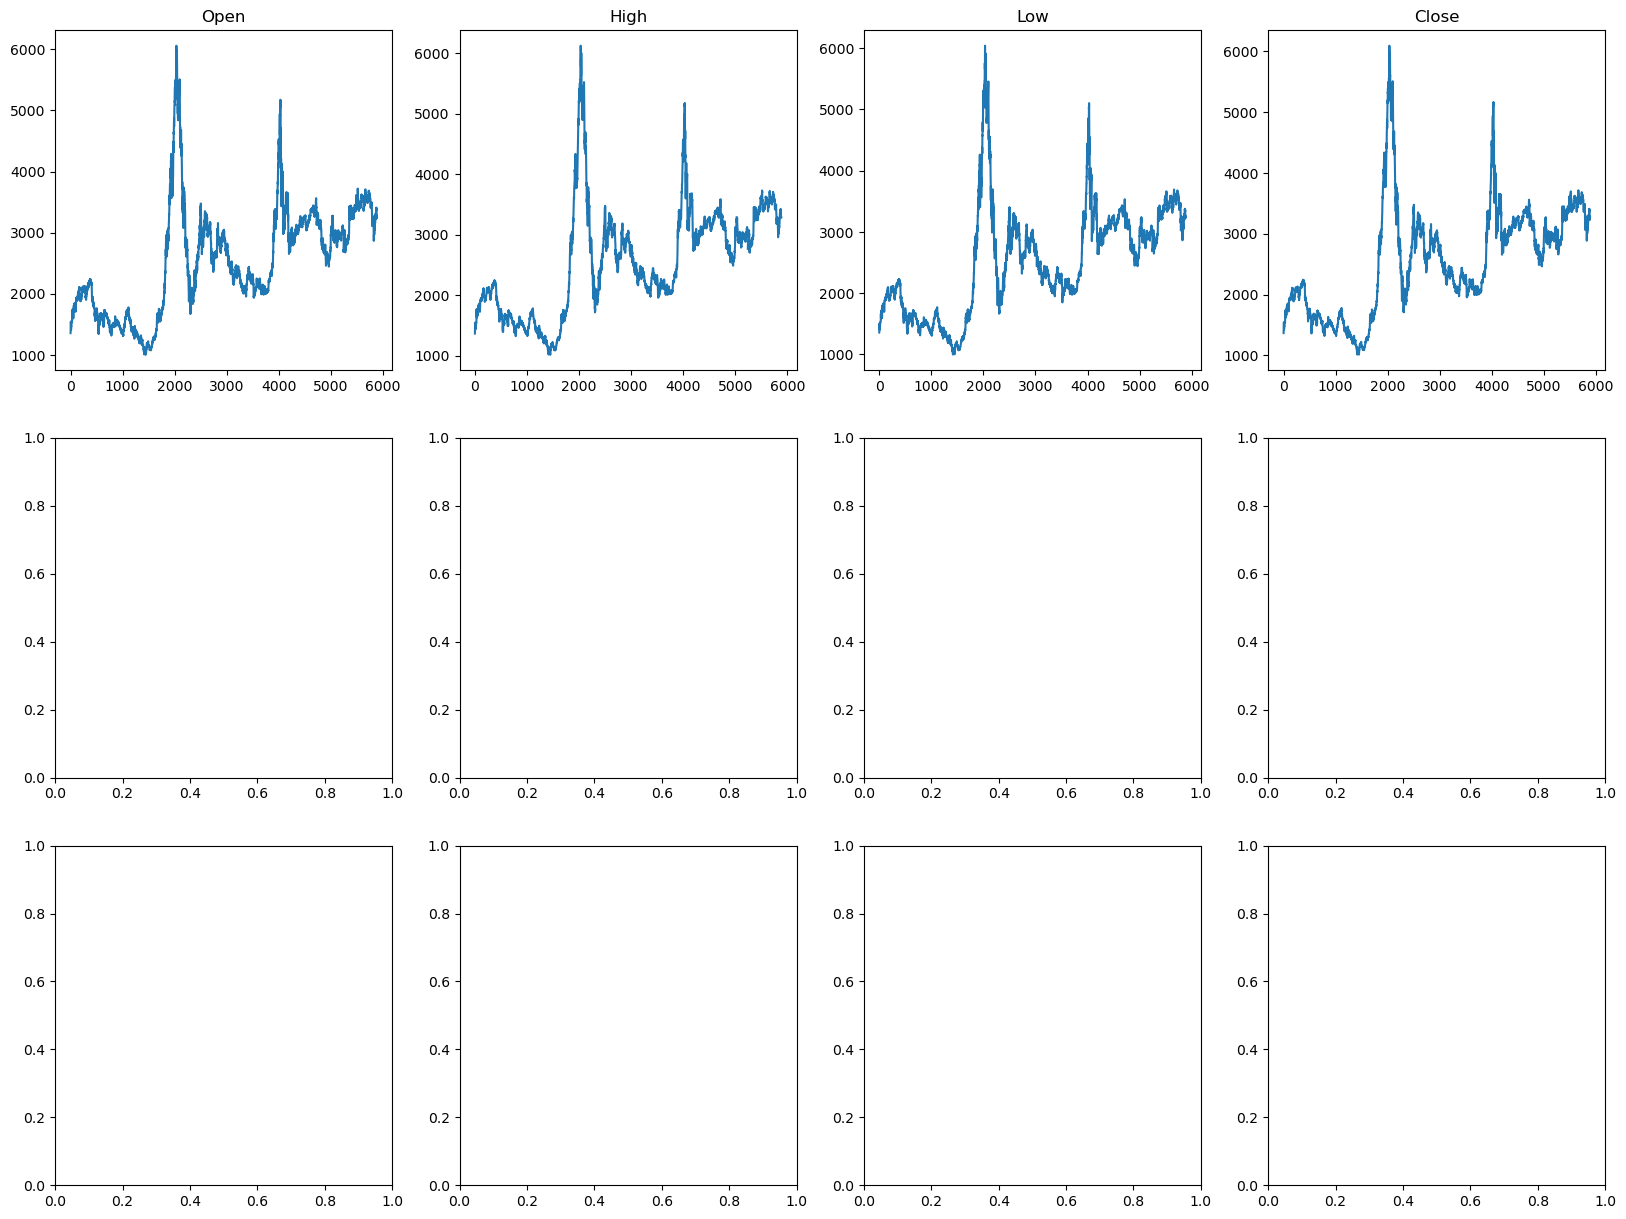

KRW_CNY


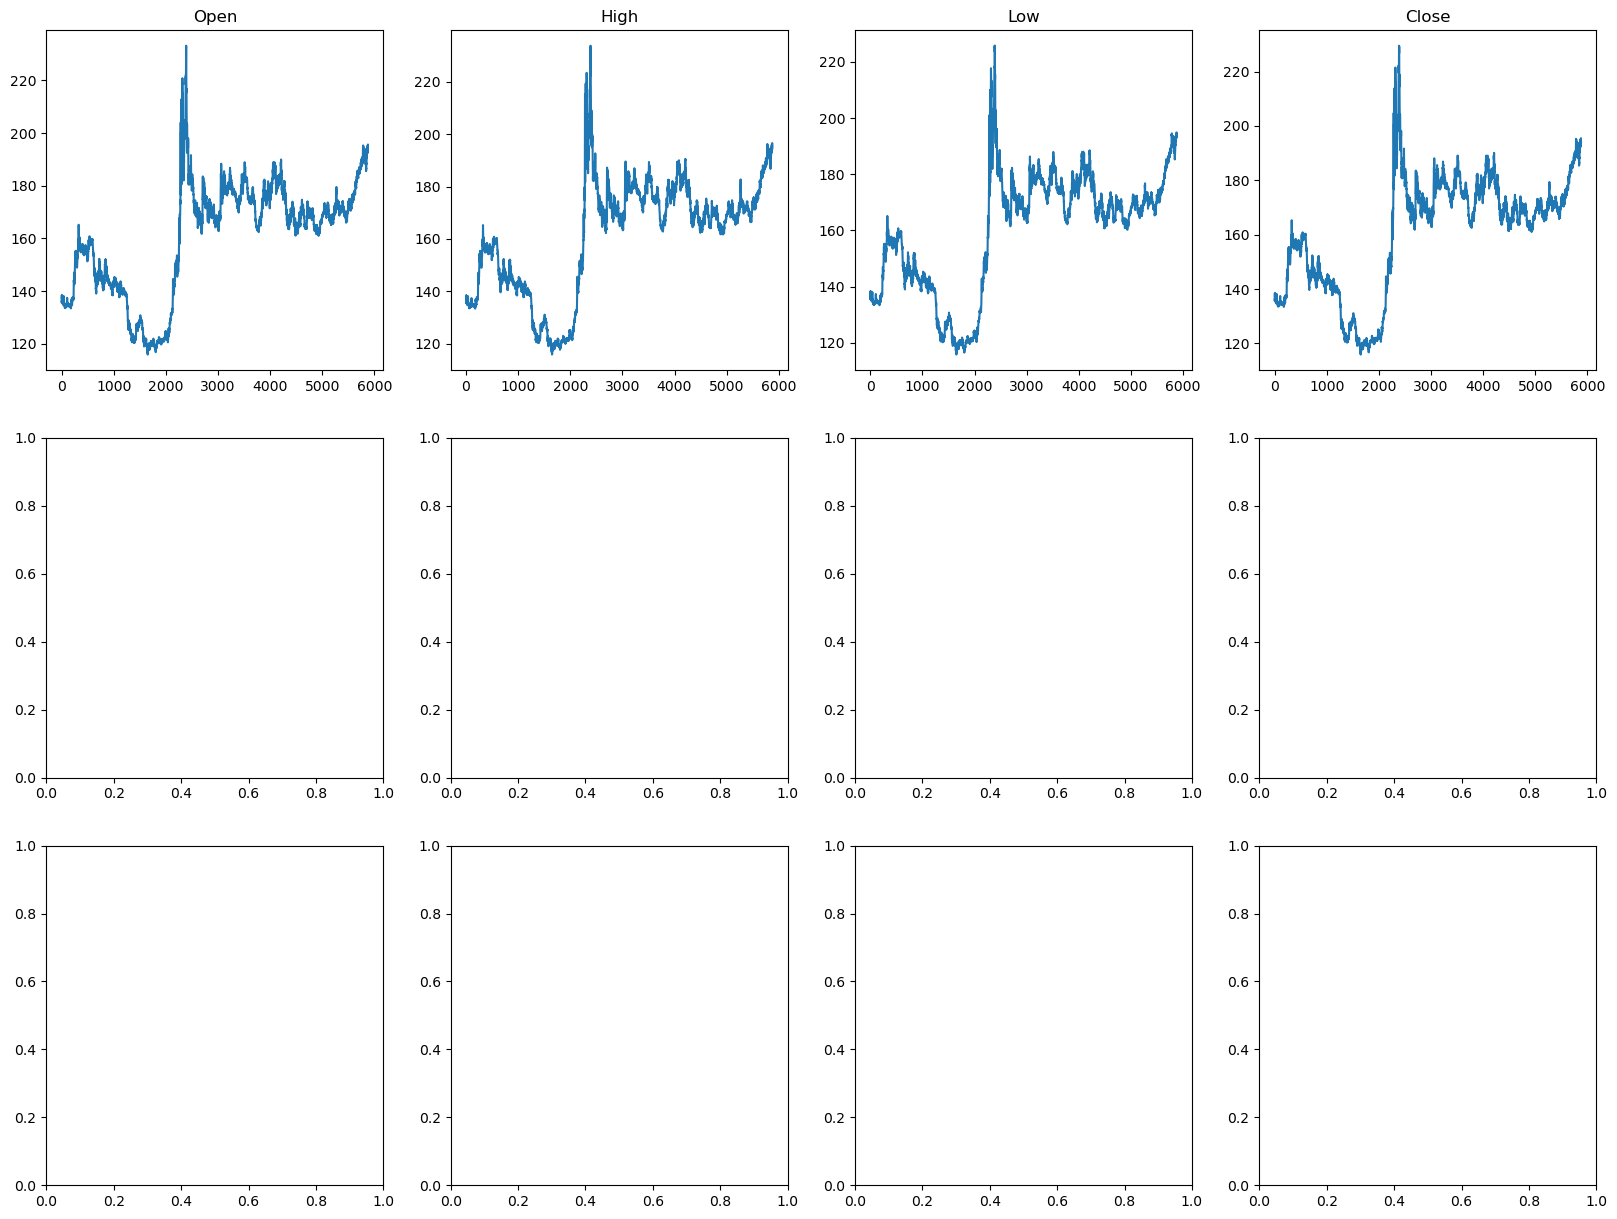

미국금리


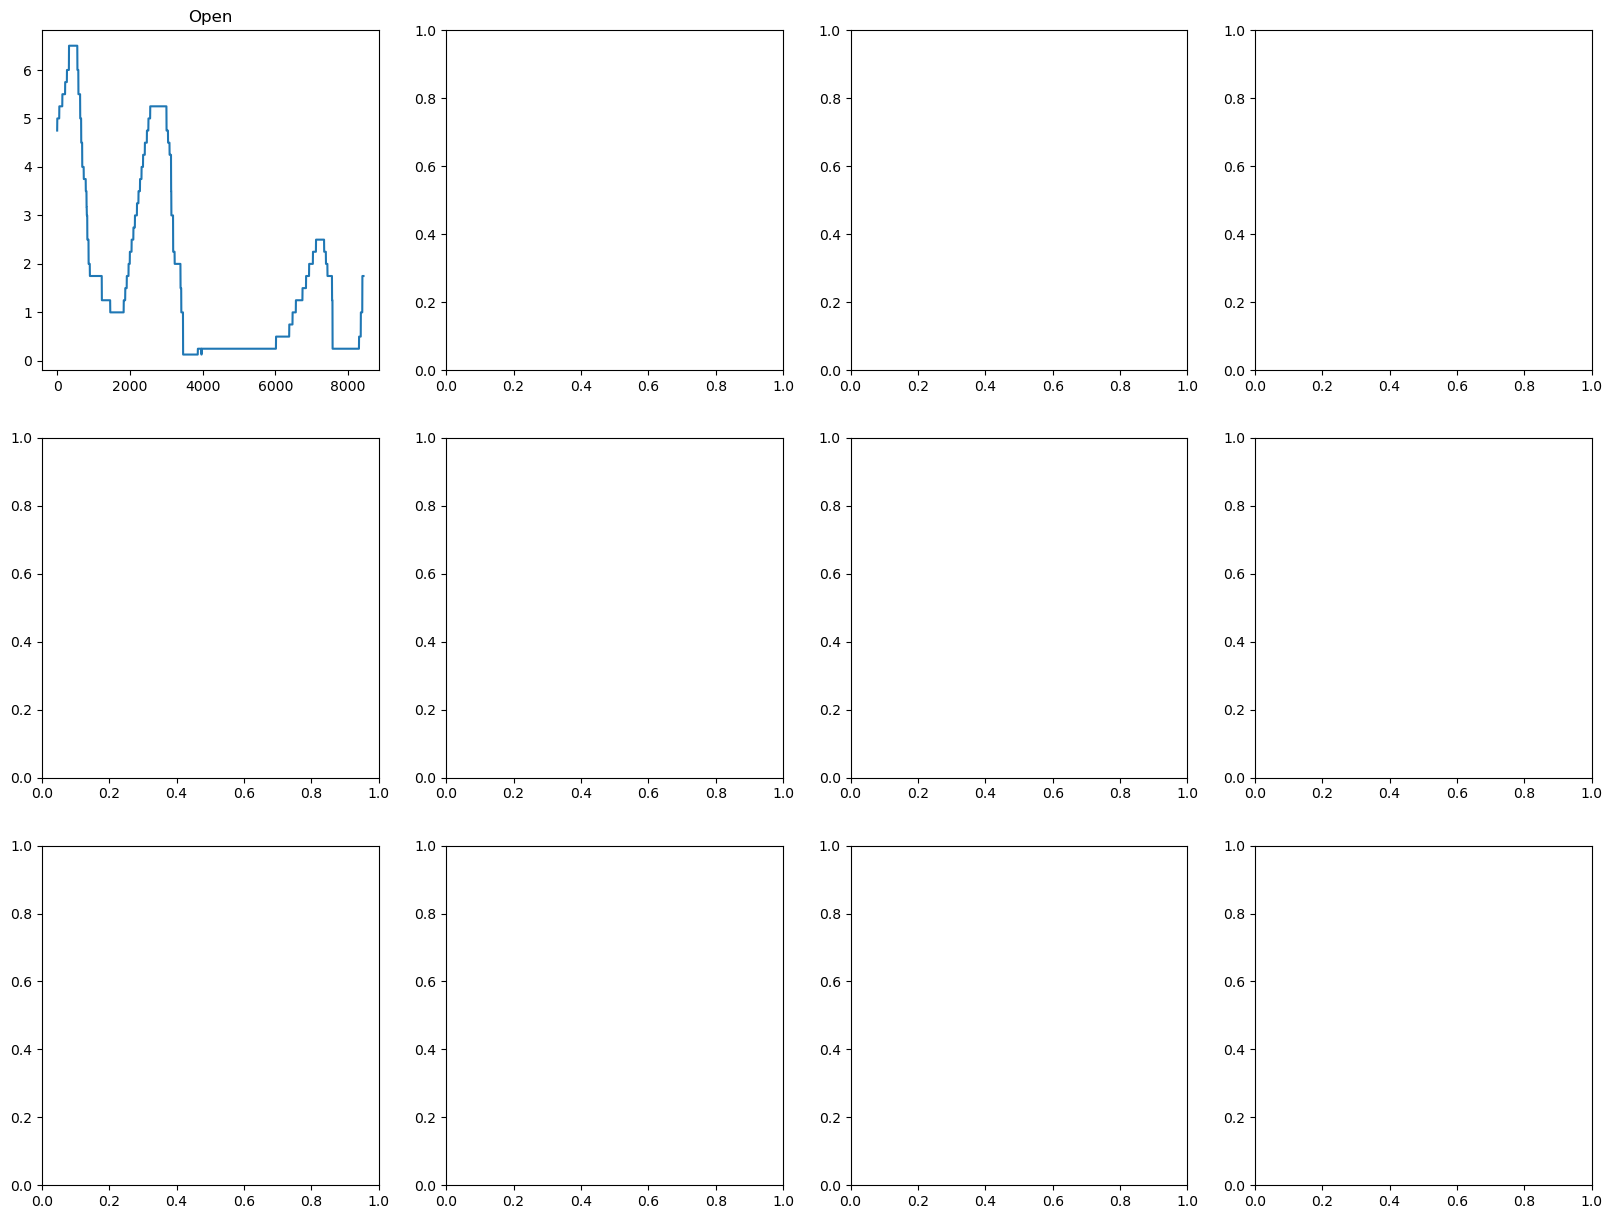

니케이 225


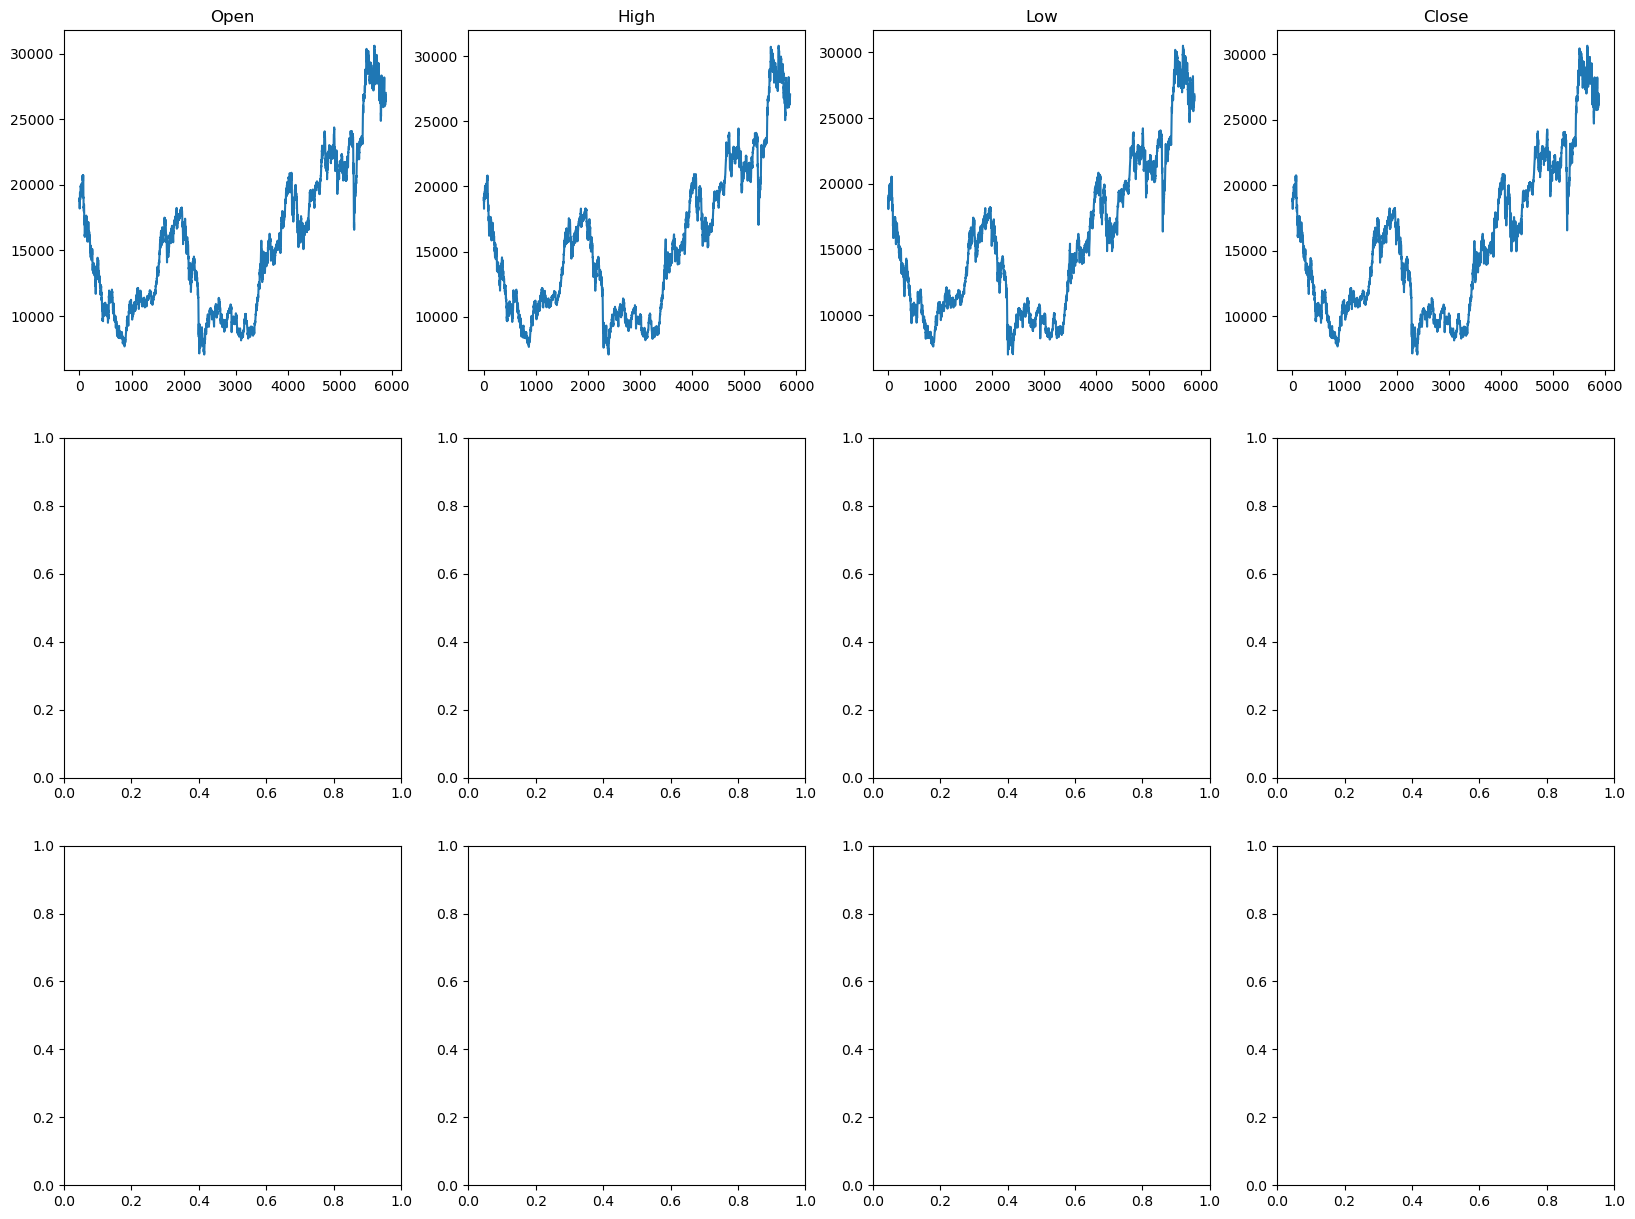

프랑스


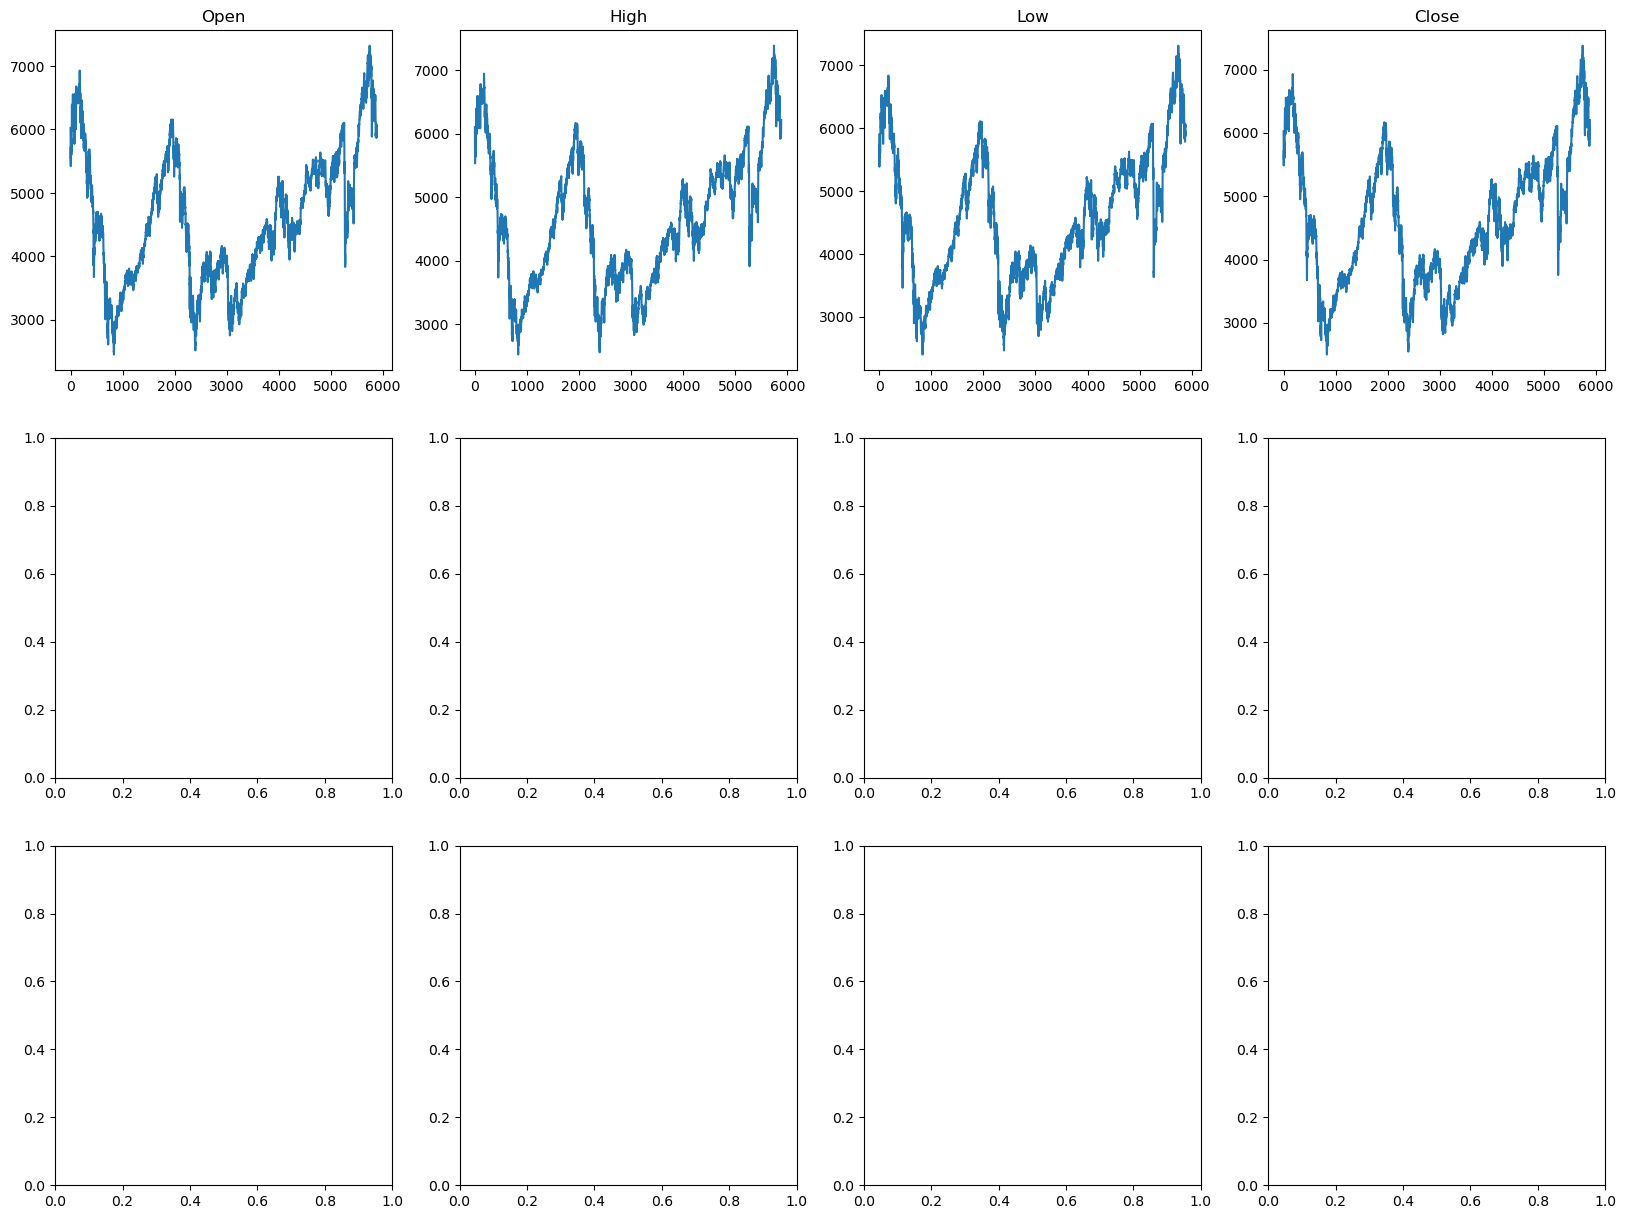

DXY


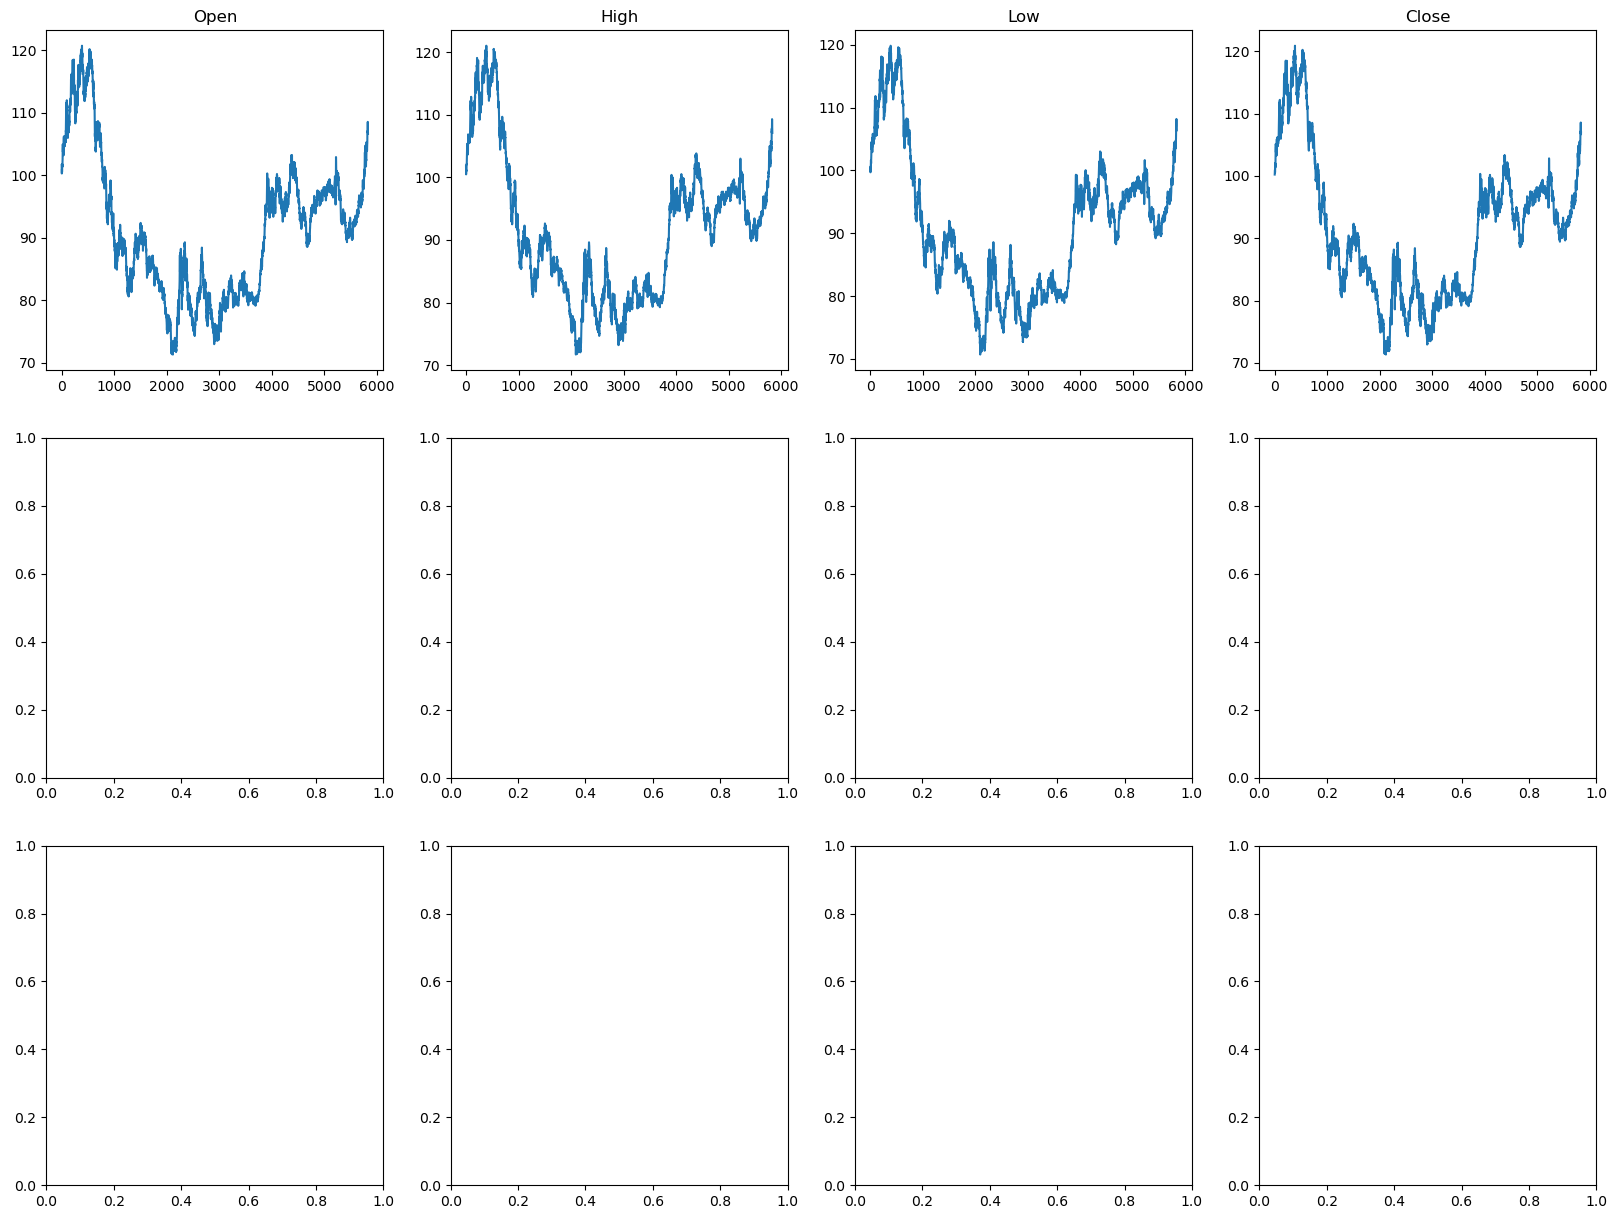

독일


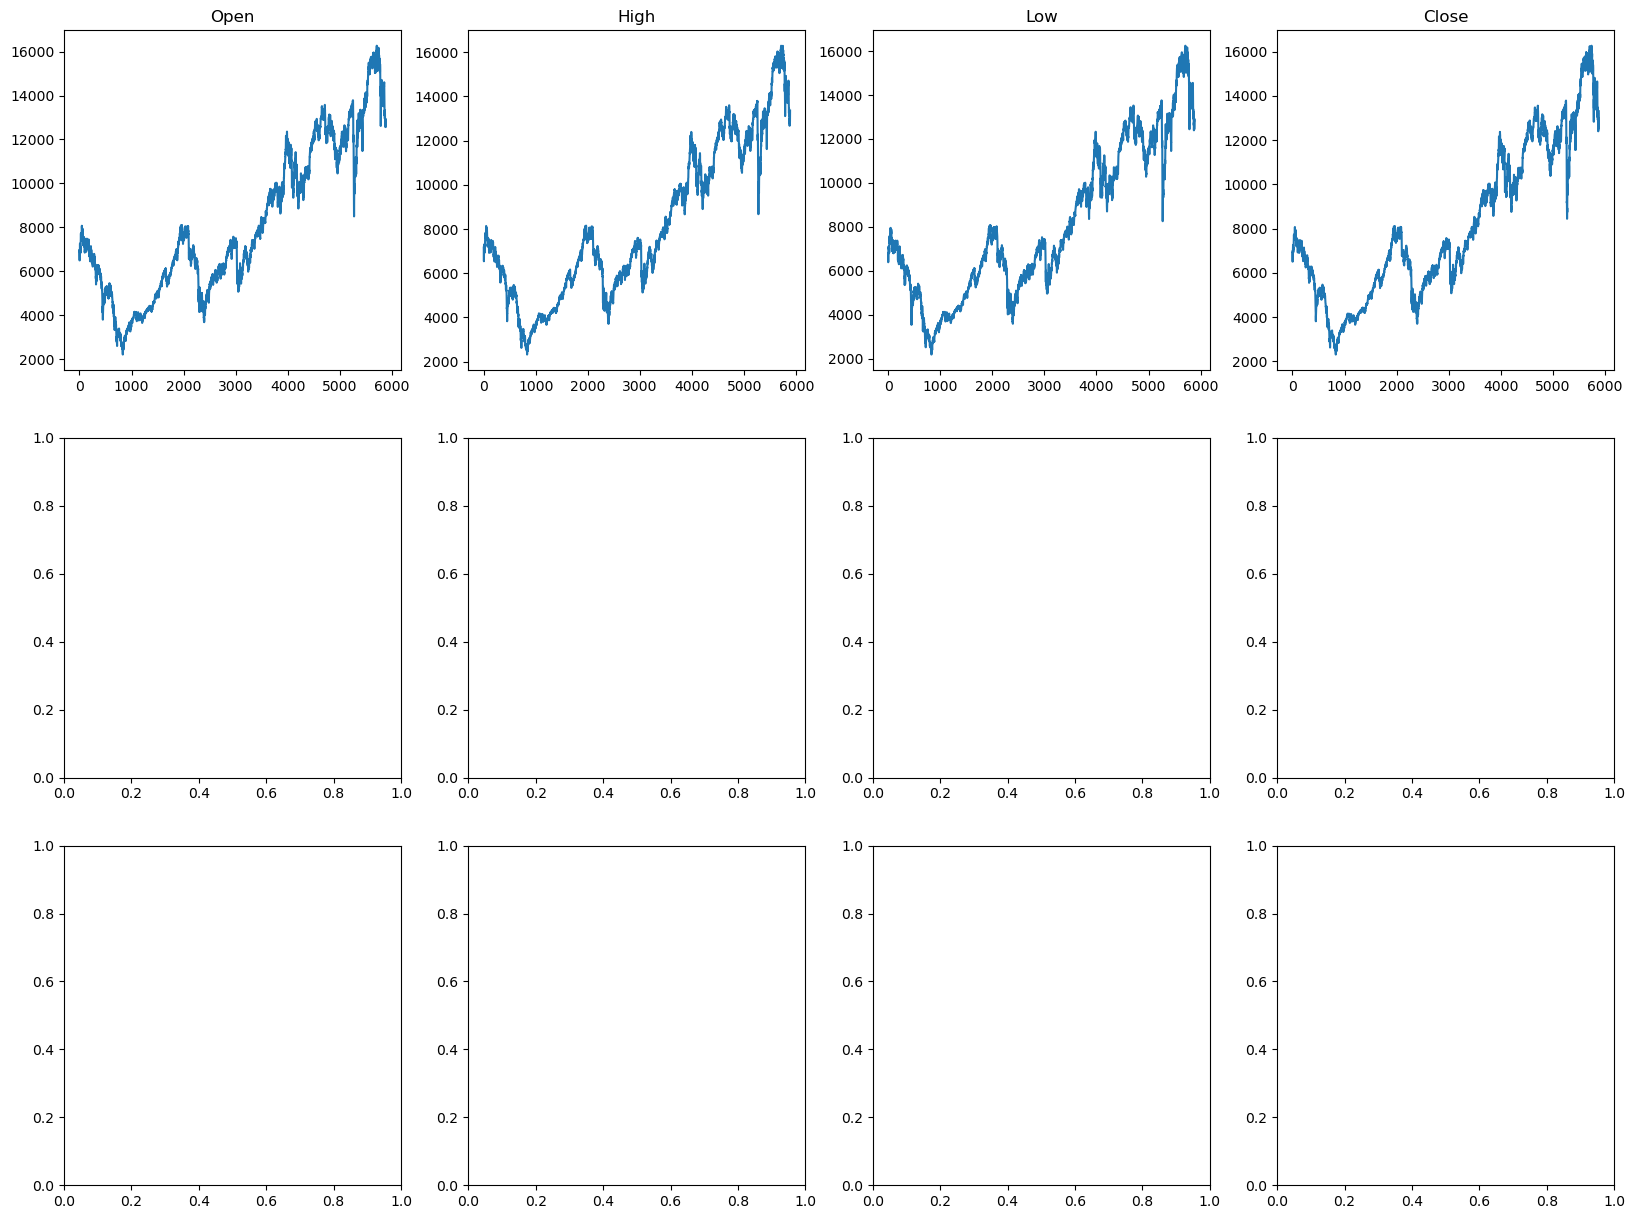

KRW_USDT


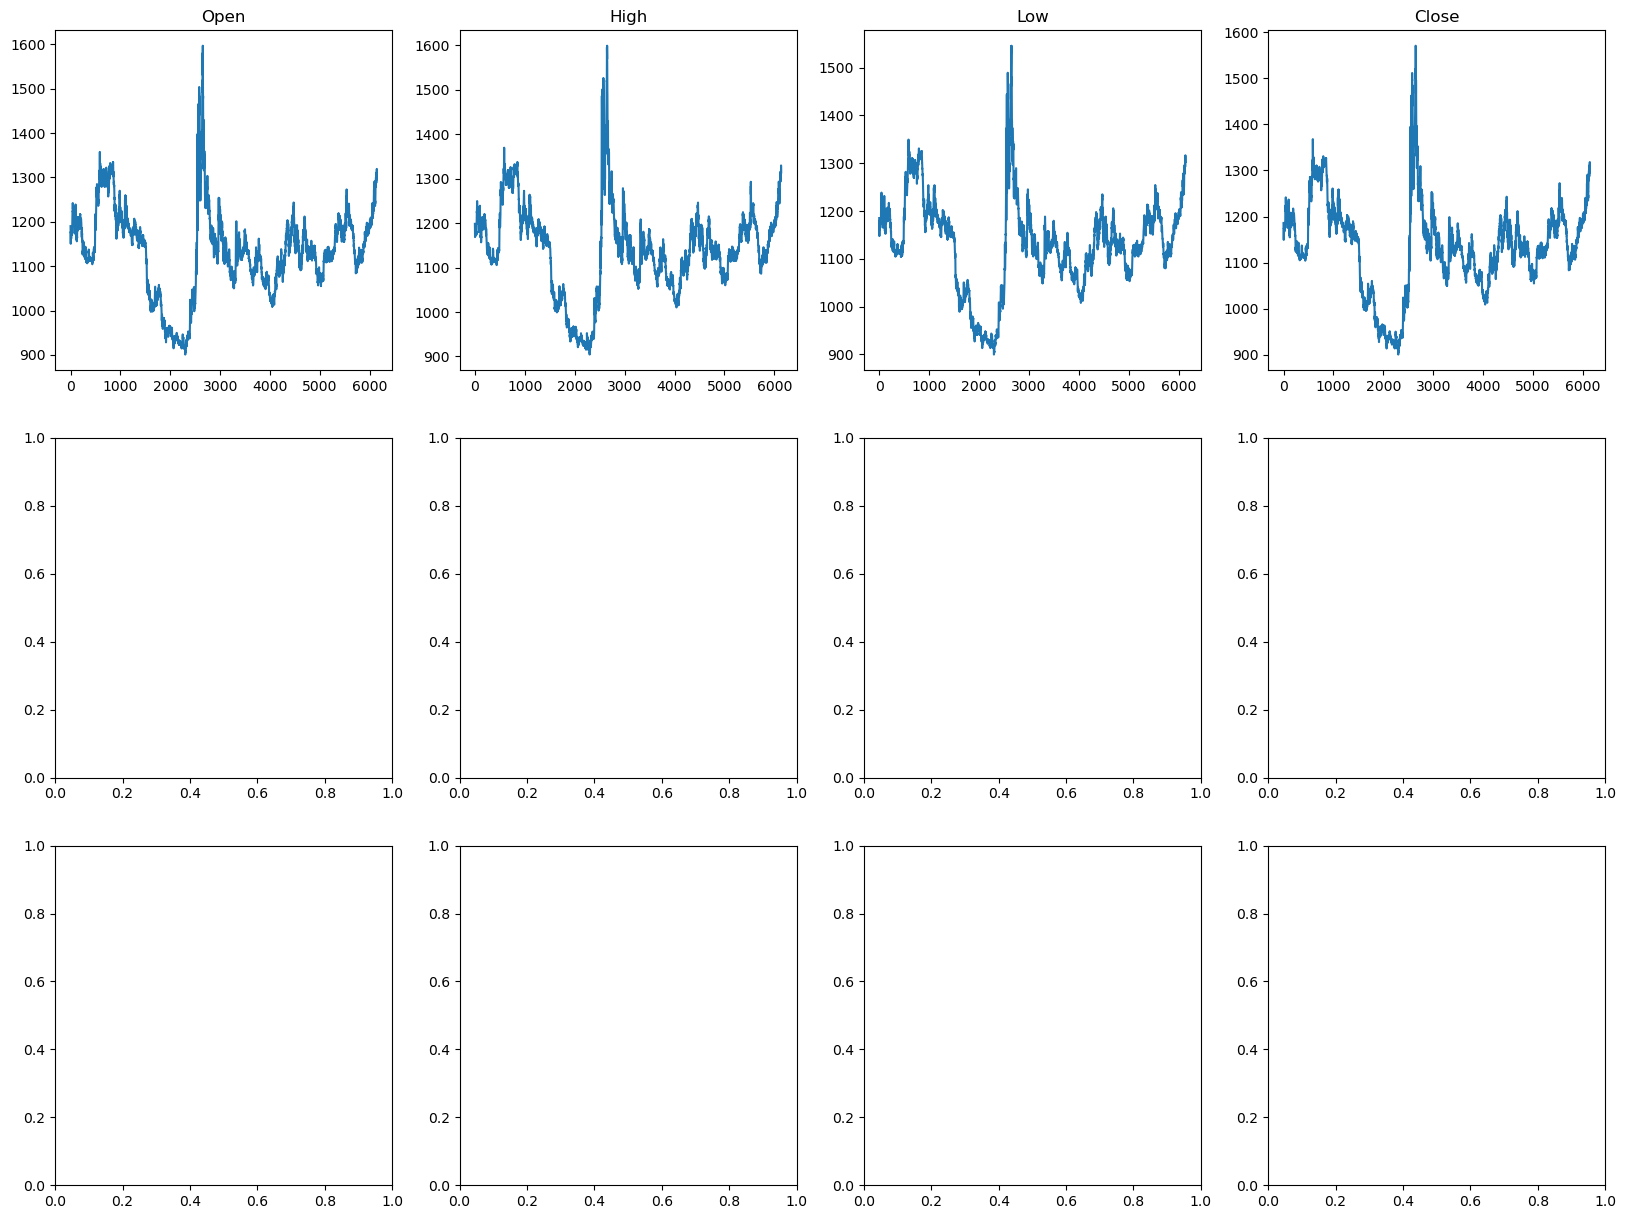

krx_100


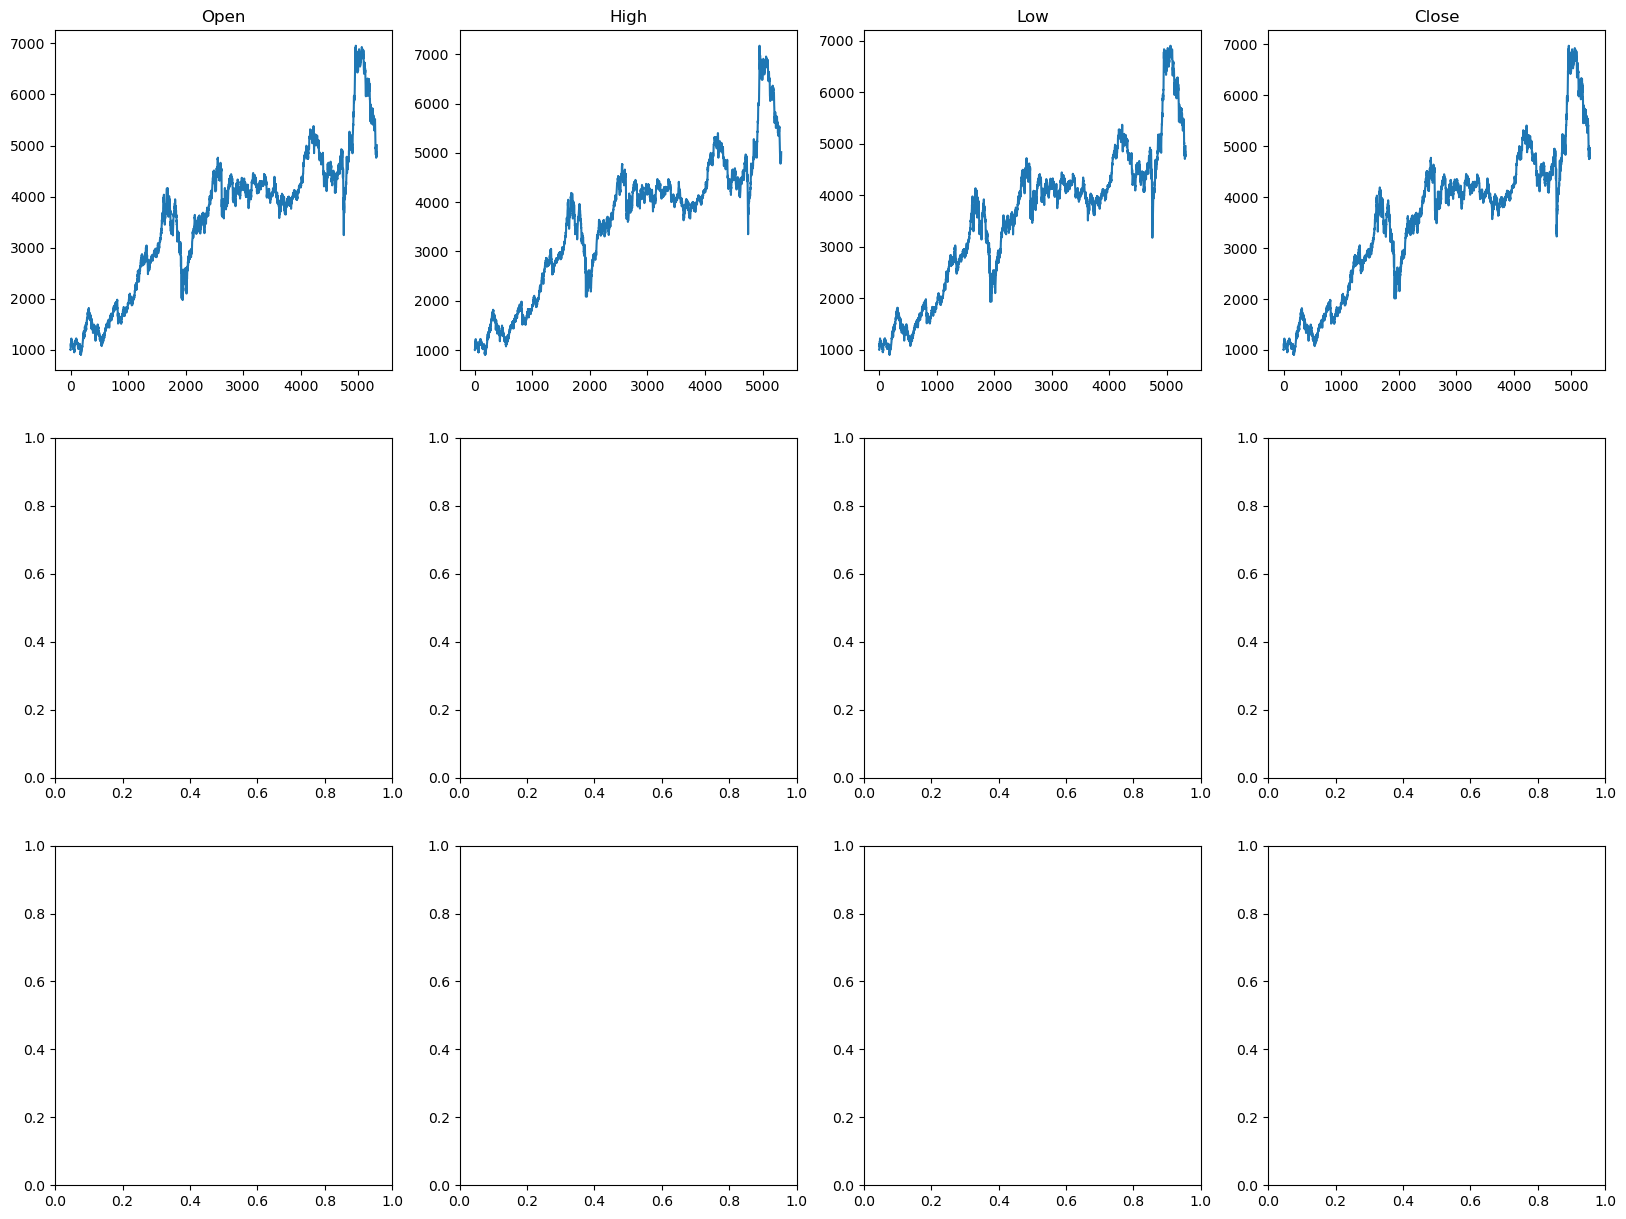

KRW_EUR


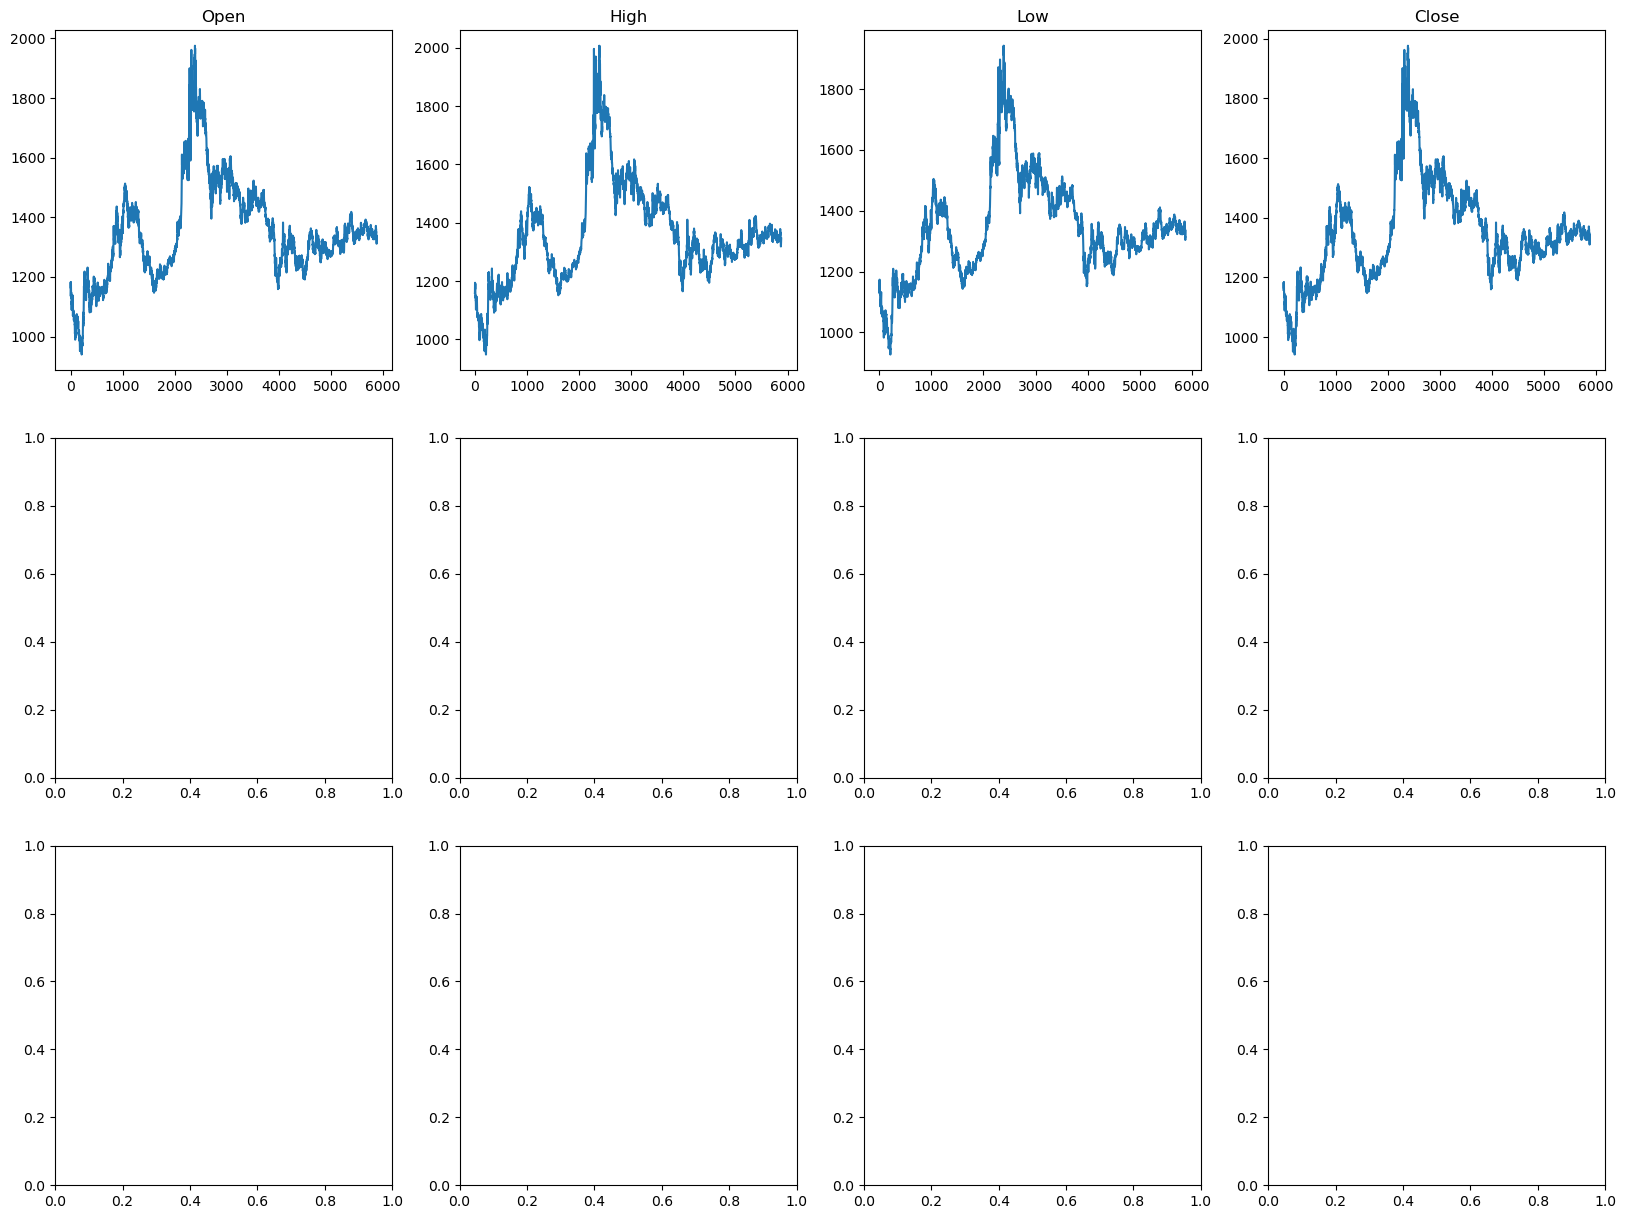

한국금리


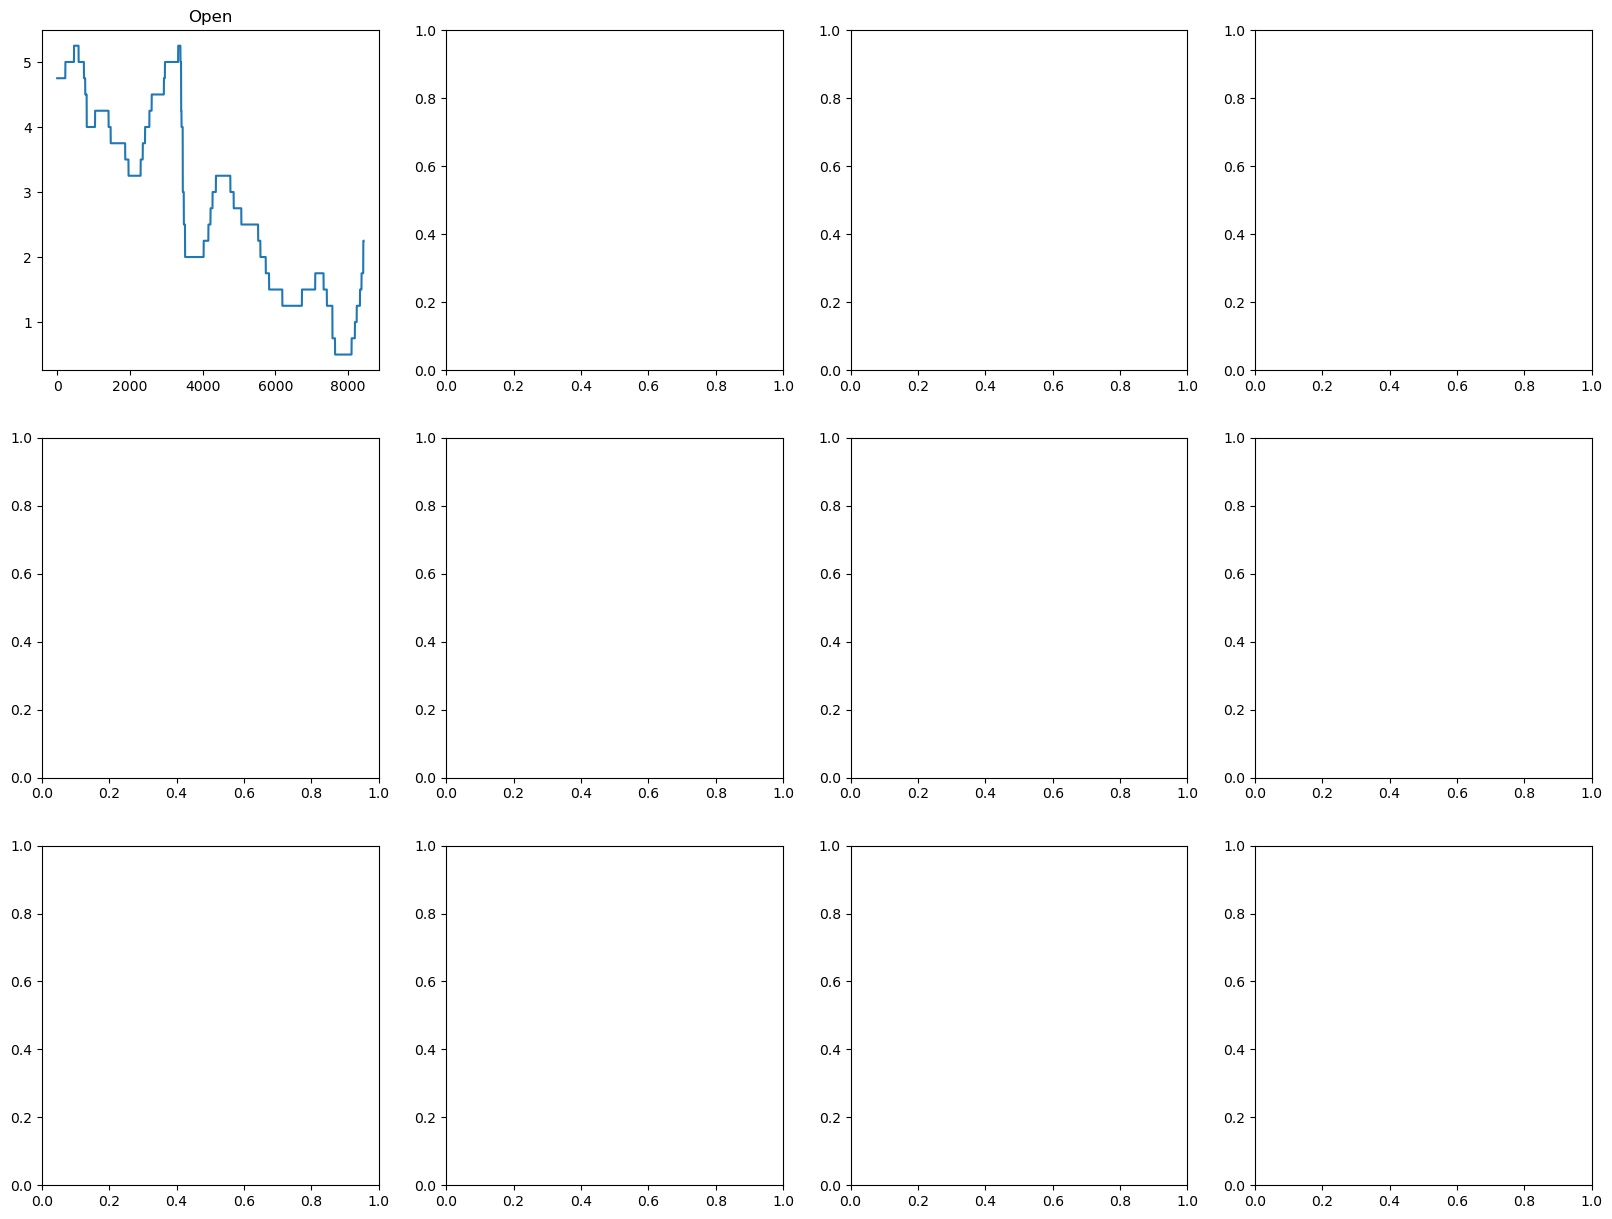

코스피


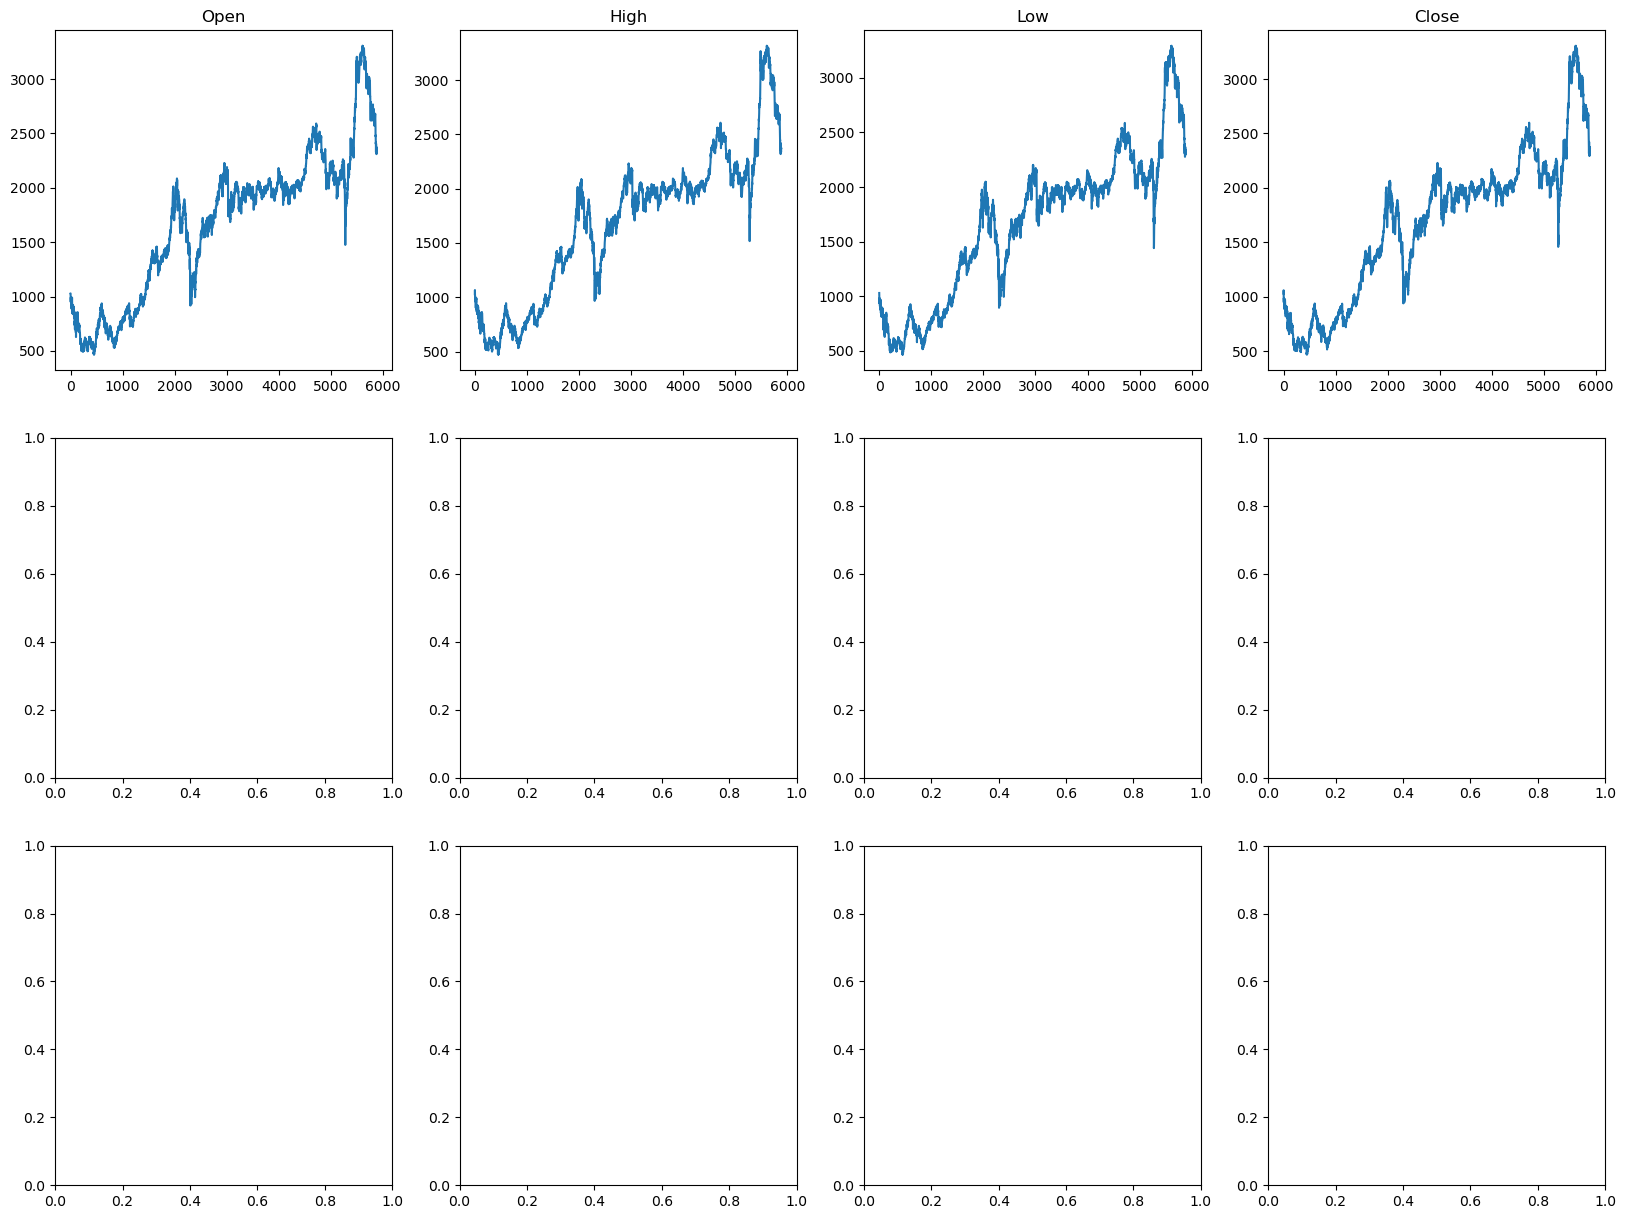

In [4]:
# 데이터 프레임 내 데이터 시각화
import math #math 모듈을 먼저 import해야 한다.    
import matplotlib.pyplot as plt
    # 데이터 프레임 모든 컬럼 그리기
    # 함수명으로도 정의하기
def columns_plot(data): # y좌표
    
#     col_list_plt = list(data.select_dtypes(exclude = "object").columns)
    col_list_plt = list(data.select_dtypes(include = ["float","int"]).columns)
    x_plt_n = 3 # 한번에 그릴 plt x 축 수
    y_plt_n = 4 # 한번에 그릴 plt y 축 수
    w_space = 0.2 # float("0."+str(x_plt_n)
    h_space = 0.2 # float("0."+str(y_plt_n)
    
    if (x_plt_n < math.ceil(len(col_list_plt) / y_plt_n)):
        x_plt_n = math.ceil(len(col_list_plt) / y_plt_n)

    #plot 이쁘게 
    f, axes = plt.subplots(x_plt_n, y_plt_n)
    f.set_size_inches((20, 15))
    plt.subplots_adjust(wspace = w_space, hspace = h_space)

    for i in range(len(col_list_plt)):

        bb = math.ceil(((i )// y_plt_n))
        axes[bb][i - math.ceil(((i )// y_plt_n)) * y_plt_n].plot(data[col_list_plt[i]],label = col_list_plt[i] )#, color = 'blue', marker = 'o')
        axes[bb][i - math.ceil(((i )// y_plt_n)) * y_plt_n].set_title(col_list_plt[i])
    plt.show()
    



for i in range(len(key_list)):
    print(key_list[i])
    columns_plot(All_data[key_list[i]])

In [5]:
# All_data , key_list
for i in range(len(key_list)):
    print(key_list[i])
    print(All_data[key_list[i]].info())
#     All_data[key_list[i]] = All_data[key_list[i]]

중화인민공화국 상해종합
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882 entries, 0 to 5881
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5882 non-null   object 
 1   Open    5877 non-null   float64
 2   High    5877 non-null   float64
 3   Low     5877 non-null   float64
 4   Close   5882 non-null   float64
dtypes: float64(4), object(1)
memory usage: 229.9+ KB
None
KRW_CNY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5878 non-null   object 
 1   Open    5878 non-null   float64
 2   High    5878 non-null   float64
 3   Low     5878 non-null   float64
 4   Close   5878 non-null   float64
dtypes: float64(4), object(1)
memory usage: 229.7+ KB
None
미국금리
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421 entries, 0 to 8420
Data columns (total 2 columns):
 #   Column  Non-Nul

In [6]:
def set_index(df):
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d', errors='raise')
    df = df.set_index('time',drop=False)
    return df

In [7]:
Use_data = {}
# All_data , key_list
for i in range(len(key_list)):
#     print(key_list[i])
#     print(All_data[key_list[i]].info())
    Use_data[key_list[i]] = All_data[key_list[i]].copy() # [["time","Open"]]
#     All_data[key_list[i]] = All_data[key_list[i]]

for i in range(len(key_list)):
    print(key_list[i],i)
    Use_data[key_list[i]] = set_index(Use_data[key_list[i]])

중화인민공화국 상해종합 0
KRW_CNY 1
미국금리 2
니케이 225 3
프랑스 4
DXY 5
독일 6
KRW_USDT 7
krx_100 8
KRW_EUR 9
한국금리 10
코스피 11


In [8]:
# 기간 조정
pariod_min_list = [Use_data[key_list[i]].index.min() for i in range(len(key_list)) ]
pariod_max_list = [Use_data[key_list[i]].index.max() for i in range(len(key_list)) ]
pariod_start = max(pariod_min_list)
pariod_end = min(pariod_max_list)
print("시작일 교집합 : ",pariod_start)
print("최종일 교집합 : ",pariod_end)

#날짜 조정.(모든 사용할 데이터들의 날짜를 같게 조정함.)
for i in range(len(key_list)):
    Use_data[key_list[i]] = Use_data[key_list[i]].loc[Use_data[key_list[i]]["time"].between(pariod_start,pariod_end)]

시작일 교집합 :  2001-01-02 00:00:00
최종일 교집합 :  2022-07-19 00:00:00


In [9]:
# 모든 컬럼명을 데이터 프레임 이름으로 바꿈
for i in range(len(key_list)):
    col_list = list(Use_data[key_list[i]].columns)
    col_list = list(set(col_list) - {"time"})
    for j in range(len(col_list)):
        print(key_list[i]+"_"+col_list[j])
        Use_data[key_list[i]] = Use_data[key_list[i]].rename(columns={col_list[j]:key_list[i]+"_"+col_list[j]})

중화인민공화국 상해종합_Low
중화인민공화국 상해종합_Close
중화인민공화국 상해종합_High
중화인민공화국 상해종합_Open
KRW_CNY_Low
KRW_CNY_Close
KRW_CNY_High
KRW_CNY_Open
미국금리_Open
니케이 225_Low
니케이 225_Close
니케이 225_High
니케이 225_Open
프랑스_Low
프랑스_Close
프랑스_High
프랑스_Open
DXY_Low
DXY_Close
DXY_High
DXY_Open
독일_Low
독일_Close
독일_High
독일_Open
KRW_USDT_Low
KRW_USDT_Close
KRW_USDT_High
KRW_USDT_Open
krx_100_Low
krx_100_Close
krx_100_High
krx_100_Open
KRW_EUR_Low
KRW_EUR_Close
KRW_EUR_High
KRW_EUR_Open
한국금리_Open
코스피_Low
코스피_Close
코스피_High
코스피_Open


In [10]:
ALL_DATA_BY_USE = pd.DataFrame()
for i in range(len(key_list)):
#     Use_data[key_list[i]]
    print(len(Use_data[key_list[i]]),key_list[i])
    if i == 0: # 처음시작만 @ 또는 가장 길이가 긴 값!!!!(날짜)
        ALL_DATA_BY_USE = Use_data[key_list[i]]
    else:
        ALL_DATA_BY_USE = pd.concat([ALL_DATA_BY_USE,Use_data[key_list[i]]],axis = 1)
#     try:
#         del ALL_DATA_BY_USE["time"]
#     except:
#         pass
ALL_DATA_BY_USE = ALL_DATA_BY_USE.fillna(method="ffill")
 
if (len(ALL_DATA_BY_USE) == len(ALL_DATA_BY_USE.drop_duplicates())): # 중복데이터가 더 없는지 확인
    pass
else:
    print("길이가 다름")
    
# try:
#     del ALL_DATA_BY_USE["time"]
# except:
#     pass

try:
    del ALL_DATA_BY_USE["time"]
except:
    pass



5621 중화인민공화국 상해종합
5617 KRW_CNY
7869 미국금리
5621 니케이 225
5621 프랑스
5577 DXY
5621 독일
5618 KRW_USDT
5325 krx_100
5619 KRW_EUR
7869 한국금리
5621 코스피


In [11]:
ALL_DATA_BY_USE

,중화인민공화국 상해종합_Open,중화인민공화국 상해종합_High,중화인민공화국 상해종합_Low,중화인민공화국 상해종합_Close,KRW_CNY_Open,KRW_CNY_High,KRW_CNY_Low,KRW_CNY_Close,미국금리_Open,니케이 225_Open,...,krx_100_Close,KRW_EUR_Open,KRW_EUR_High,KRW_EUR_Low,KRW_EUR_Close,한국금리_Open,코스피_Open,코스피_High,코스피_Low,코스피_Close
time,,,,,,,,,,,,,,,,,,,,,
2001-01-02,2077.076,2103.538,2074.882,2103.47,154.27,154.39,154.27,154.39,6.50,13899.49,...,1000.00,1190.12,1216.08,1180.63,1213.78,5.25,503.31,521.34,500.97,520.95
2001-01-03,2108.254,2123.900,2105.497,2123.90,153.37,153.49,153.37,153.49,6.50,13899.49,...,997.82,1213.92,1228.95,1177.08,1179.15,5.25,512.74,524.58,510.70,521.43
2001-01-04,2125.485,2127.419,2113.179,2125.49,152.49,152.61,152.49,152.61,6.50,13898.09,...,1071.24,1176.95,1202.34,1151.96,1199.57,5.25,551.53,567.16,550.91,558.02
2001-01-05,2117.664,2125.381,2114.056,2125.30,152.40,152.52,152.40,152.52,6.00,13763.22,...,1111.68,1198.81,1219.05,1193.57,1209.47,5.25,559.54,581.41,555.40,580.85
2001-01-06,2117.664,2125.381,2114.056,2125.30,152.40,152.52,152.40,152.52,6.00,13763.22,...,1111.68,1198.81,1219.05,1193.57,1209.47,5.25,559.54,581.41,555.40,580.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,3261.380,3288.920,3228.060,3228.06,195.02,196.58,194.88,194.98,1.75,26736.08,...,4833.14,1319.95,1336.80,1319.26,1329.20,2.25,2335.12,2337.30,2293.45,2330.98
2022-07-16,3261.380,3288.920,3228.060,3228.06,195.02,196.58,194.88,194.98,1.75,26736.08,...,4833.14,1319.95,1336.80,1319.26,1329.20,2.25,2335.12,2337.30,2293.45,2330.98
2022-07-17,3261.380,3288.920,3228.060,3228.06,195.02,196.58,194.88,194.98,1.75,26736.08,...,4833.14,1319.95,1336.80,1319.26,1329.20,2.25,2335.12,2337.30,2293.45,2330.98


In [12]:
# # 종가 컬럼 제거.
# col_list_2 = list(ALL_DATA_BY_USE.columns)
# use_list= []
# for i in col_list_2:
#     if(i.find("Close") != -1):
#         pass
#     else:
#         use_list.append(i)
# ALL_DATA_BY_USE = ALL_DATA_BY_USE[use_list]

모델이 오늘 시가 대비 다음날 고가보다 높은지만 알면 된다!!!!

In [13]:


# 이렇게 설정하면 다음날 얼마나 오르고 내리는지 예측하게 됨.
ALL_DATA_BY_USE["KRW_USDT_High - KRW_USDT_Open"] = ALL_DATA_BY_USE["KRW_USDT_High"] - ALL_DATA_BY_USE["KRW_USDT_Open"] # 변동성
ALL_DATA_BY_USE["KRW_USDT_Open_shift_1"] = ALL_DATA_BY_USE[["KRW_USDT_Open"]].shift(-1) #다음날 시작가 데이터 까지 가지고 시작

In [14]:
# 일단 다음날 시가를 예측해보자.!!
use_columns = list(ALL_DATA_BY_USE.columns)
print(use_columns)
target = "KRW_USDT_Open"#"KRW_USDT_High - KRW_USDT_Open" # "KRW_USDT_Open"
ALL_DATA_BY_USE = ALL_DATA_BY_USE.dropna()
ALL_DATA_BY_USE[[target]]

['중화인민공화국 상해종합_Open', '중화인민공화국 상해종합_High', '중화인민공화국 상해종합_Low', '중화인민공화국 상해종합_Close', 'KRW_CNY_Open', 'KRW_CNY_High', 'KRW_CNY_Low', 'KRW_CNY_Close', '미국금리_Open', '니케이 225_Open', '니케이 225_High', '니케이 225_Low', '니케이 225_Close', '프랑스_Open', '프랑스_High', '프랑스_Low', '프랑스_Close', 'DXY_Open', 'DXY_High', 'DXY_Low', 'DXY_Close', '독일_Open', '독일_High', '독일_Low', '독일_Close', 'KRW_USDT_Open', 'KRW_USDT_High', 'KRW_USDT_Low', 'KRW_USDT_Close', 'krx_100_Open', 'krx_100_High', 'krx_100_Low', 'krx_100_Close', 'KRW_EUR_Open', 'KRW_EUR_High', 'KRW_EUR_Low', 'KRW_EUR_Close', '한국금리_Open', '코스피_Open', '코스피_High', '코스피_Low', '코스피_Close', 'KRW_USDT_High - KRW_USDT_Open', 'KRW_USDT_Open_shift_1']


,KRW_USDT_Open
time,
2001-01-02,1261.00
2001-01-03,1278.00
2001-01-04,1270.50
2001-01-05,1263.30
2001-01-06,1263.30
...,...
2022-07-14,1305.10
2022-07-15,1317.57
2022-07-16,1317.57


#### 파생변수 생성(금리 상승 하락 1,0으로) or 그냥 예측
#### LSTM 사용

In [15]:
## 교수님과 토론할것 => 몇일이나 뒤의 달러를 예측해야 할까..? 또 이부분에 따라서 수익율이 달라지게 나올 수 있을 것 같음. => LP모델을 사용? grid search 를 사용..?


In [16]:
# 파생변수 # 새로 만들것! @
# ALL_DATA_BY_USE["한국금리"]
# ALL_DATA_BY_USE["미국금리"]


In [17]:
# index가 time의 경우 안좋기 때문에 인덱스 변환.
ALL_DATA_BY_USE = ALL_DATA_BY_USE.reset_index(drop = True)
ALL_DATA_BY_USE

,중화인민공화국 상해종합_Open,중화인민공화국 상해종합_High,중화인민공화국 상해종합_Low,중화인민공화국 상해종합_Close,KRW_CNY_Open,KRW_CNY_High,KRW_CNY_Low,KRW_CNY_Close,미국금리_Open,니케이 225_Open,...,KRW_EUR_High,KRW_EUR_Low,KRW_EUR_Close,한국금리_Open,코스피_Open,코스피_High,코스피_Low,코스피_Close,KRW_USDT_High - KRW_USDT_Open,KRW_USDT_Open_shift_1
0,2077.076,2103.538,2074.882,2103.47,154.27,154.39,154.27,154.39,6.50,13899.49,...,1216.08,1180.63,1213.78,5.25,503.31,521.34,500.97,520.95,20.00,1278.00
1,2108.254,2123.900,2105.497,2123.90,153.37,153.49,153.37,153.49,6.50,13899.49,...,1228.95,1177.08,1179.15,5.25,512.74,524.58,510.70,521.43,14.50,1270.50
2,2125.485,2127.419,2113.179,2125.49,152.49,152.61,152.49,152.61,6.50,13898.09,...,1202.34,1151.96,1199.57,5.25,551.53,567.16,550.91,558.02,0.00,1263.30
3,2117.664,2125.381,2114.056,2125.30,152.40,152.52,152.40,152.52,6.00,13763.22,...,1219.05,1193.57,1209.47,5.25,559.54,581.41,555.40,580.85,11.70,1263.30
4,2117.664,2125.381,2114.056,2125.30,152.40,152.52,152.40,152.52,6.00,13763.22,...,1219.05,1193.57,1209.47,5.25,559.54,581.41,555.40,580.85,11.70,1263.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,3277.450,3299.250,3261.490,3281.74,194.25,196.21,194.01,194.79,1.75,26357.32,...,1329.46,1308.95,1318.52,2.25,2316.41,2338.29,2307.69,2322.32,22.21,1317.57
7864,3261.380,3288.920,3228.060,3228.06,195.02,196.58,194.88,194.98,1.75,26736.08,...,1336.80,1319.26,1329.20,2.25,2335.12,2337.30,2293.45,2330.98,12.01,1317.57
7865,3261.380,3288.920,3228.060,3228.06,195.02,196.58,194.88,194.98,1.75,26736.08,...,1336.80,1319.26,1329.20,2.25,2335.12,2337.30,2293.45,2330.98,12.01,1317.57
7866,3261.380,3288.920,3228.060,3228.06,195.02,196.58,194.88,194.98,1.75,26736.08,...,1336.80,1319.26,1329.20,2.25,2335.12,2337.30,2293.45,2330.98,12.01,1319.15


### 시계열 분해 데이터 추가


<Figure size 640x480 with 0 Axes>

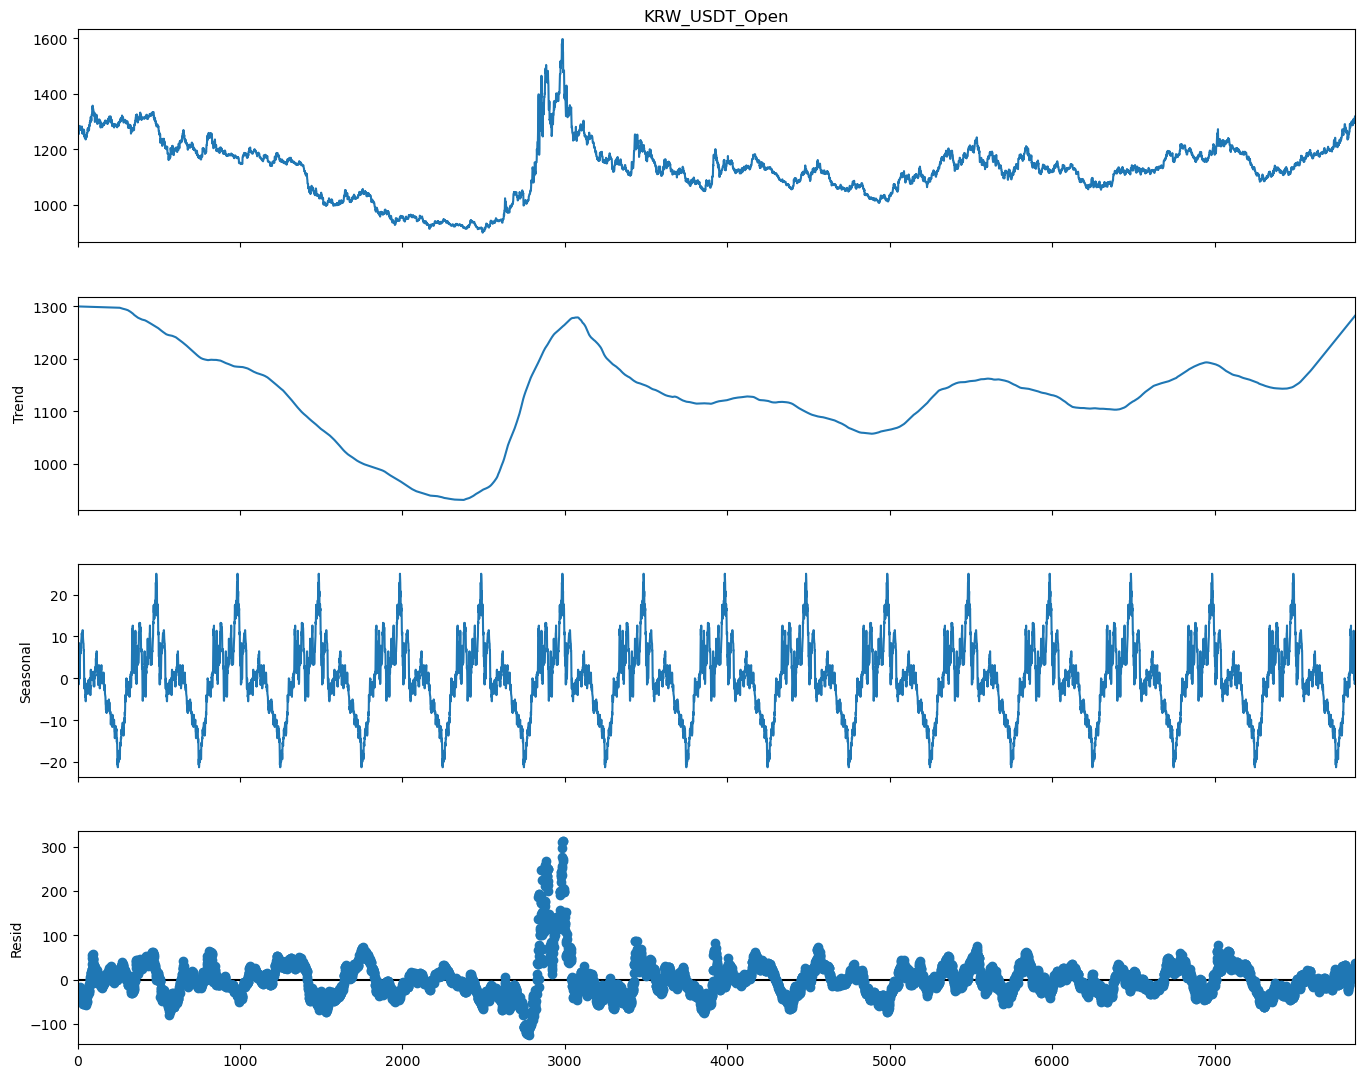

In [18]:

from statsmodels.tsa.seasonal import seasonal_decompose


target_col = seasonal_decompose(ALL_DATA_BY_USE[target], model = 'additive' ,period = 500, extrapolate_trend = 1)

fig = plt.figure()
fig = target_col.plot()
fig.set_size_inches(15,12)

ALL_DATA_BY_USE[target+'col_trend'] = target_col.trend
ALL_DATA_BY_USE[target+'col_seasonal'] = target_col.seasonal
ALL_DATA_BY_USE[target+'col_resid'] = target_col.resid

In [19]:
# @@ 나중에 a는 김프 예측할때에 맞춰서 바꾸기 (날짜 약 2년정도만 수익율 보게)
# ALL_DATA_BY_USE[:-a]

In [20]:
len(ALL_DATA_BY_USE.columns)

47

In [21]:
ALL_DATA_BY_USE.columns

Index(['중화인민공화국 상해종합_Open', '중화인민공화국 상해종합_High', '중화인민공화국 상해종합_Low',
       '중화인민공화국 상해종합_Close', 'KRW_CNY_Open', 'KRW_CNY_High', 'KRW_CNY_Low',
       'KRW_CNY_Close', '미국금리_Open', '니케이 225_Open', '니케이 225_High',
       '니케이 225_Low', '니케이 225_Close', '프랑스_Open', '프랑스_High', '프랑스_Low',
       '프랑스_Close', 'DXY_Open', 'DXY_High', 'DXY_Low', 'DXY_Close', '독일_Open',
       '독일_High', '독일_Low', '독일_Close', 'KRW_USDT_Open', 'KRW_USDT_High',
       'KRW_USDT_Low', 'KRW_USDT_Close', 'krx_100_Open', 'krx_100_High',
       'krx_100_Low', 'krx_100_Close', 'KRW_EUR_Open', 'KRW_EUR_High',
       'KRW_EUR_Low', 'KRW_EUR_Close', '한국금리_Open', '코스피_Open', '코스피_High',
       '코스피_Low', '코스피_Close', 'KRW_USDT_High - KRW_USDT_Open',
       'KRW_USDT_Open_shift_1', 'KRW_USDT_Opencol_trend',
       'KRW_USDT_Opencol_seasonal', 'KRW_USDT_Opencol_resid'],
      dtype='object')

In [22]:
col_index = ['한국금리_Open', 'KRW_USDT_Open', 'KRW_USDT_High', 'KRW_USDT_Low',
       'KRW_USDT_Close', '미국금리_Open', 'KRW_CNY_Open', 'KRW_CNY_High',
       'KRW_CNY_Low', 'KRW_CNY_Close', 'krx_100_Open', 'krx_100_High',
       'krx_100_Low', 'krx_100_Close', '중화인민공화국 상해종합_Open',
       '중화인민공화국 상해종합_High', '중화인민공화국 상해종합_Low', '중화인민공화국 상해종합_Close',
       '프랑스_Open', '프랑스_High', '프랑스_Low', '프랑스_Close', '니케이 225_Open',
       '니케이 225_High', '니케이 225_Low', '니케이 225_Close', 'KRW_EUR_Open',
       'KRW_EUR_High', 'KRW_EUR_Low', 'KRW_EUR_Close', '독일_Open', '독일_High',
       '독일_Low', '독일_Close', '코스피_Open', '코스피_High', '코스피_Low', '코스피_Close',
       'DXY_Open', 'DXY_High', 'DXY_Low', 'DXY_Close',
       'KRW_USDT_High - KRW_USDT_Open', 'KRW_USDT_Open_shift_1',
       'KRW_USDT_Opencol_trend', 'KRW_USDT_Opencol_seasonal',
       'KRW_USDT_Opencol_resid']
len(col_index)

47

In [23]:
ALL_DATA_BY_USE = ALL_DATA_BY_USE[col_index]

### 머신러닝(딥러닝 제외)를 위한 데이터 전처리
추가할것.. scaling에 있어서 정해진 범위 까지만 스케일링 하여야 하나..

In [24]:
# X_data = ALL_DATA_BY_USE[list(set(use_columns) - {target})]
X_data = ALL_DATA_BY_USE
Y_data = ALL_DATA_BY_USE[[target]]
ALL_DATA_BY_USE = pd.concat([X_data,Y_data],axis = 1)

In [25]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,LabelEncoder,StandardScaler

# 이부분 class로 변환할까? 나중에 정해진 범위까지만 데이터 스케일링 할 수도 있음.
# def MinMaxScaler_fun(df): #맞춤 변환 함수와 그에 맞는 데이터를 돌려줌
#     col = list(df.columns)
#     Scaler = MinMaxScaler()
#     Scaler.fit(df)
#     df = Scaler.transform(df)
# #     df = Scaler_X.fit_transform(df)
#     df = pd.DataFrame(df, columns = X_col)
#     return df, Scaler
# X_data ,Scaler = MinMaxScaler_fun(X_data)
# Y_data , Y_data_Scaler = MinMaxScaler_fun(Y_data)

X_col = list(X_data.columns)
Scaler = MinMaxScaler()
Scaler.fit(X_data)
X_data = Scaler.transform(X_data)
#     df = Scaler_X.fit_transform(df)
X_data = pd.DataFrame(X_data, columns = X_col)
    
# 모데링 잘나오게만 할거면 이렇게 하면 됨



# @@ 나중에 여기에 검증셋으로 나누어서 하는 모델도 추가.

In [26]:
# 최대최소 정규화
Y_col = list(Y_data.columns)

MAX_val = float(max(Y_data.values))
MIN_val = float(min(Y_data.values))
# 변환(man,max 변환을 또해주면 기존값을 잃어버림.)
Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x - MIN_val)/(MAX_val - MIN_val))
# 역변환
# Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val))

### LSTM을 위한 전처리
사용가능 초매게변수 : 에포크 , 배치사이즈, 윈도우 사이즈 , 변수 추가 , 활성화 함수(럭키렐루)수치,  최적회기법(adam)(RMSprop), 
또.... 뭐가 있지..

In [27]:
# 지정해야할 초기변수들 
WINDOW_SIZE=64 # 64 #1024 # n일간 데이터를 기반으로 내일 데이터 예측 
BATCH_SIZE=4 # 16 # 32
day_offset = 0 # 예측할 미래 날짜 day_offset = 0 이면 하루 뒤

In [28]:
def make_window_size_dataset(data, label, window_size, day_offset=0): # x값 , y값 , 윈도우 사이즈, 예측할 미래 날짜
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size - day_offset):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size + day_offset]))
    return np.array(feature_list), np.array(label_list)

x_WINDOW, y_WINDOW = make_window_size_dataset(X_data, Y_data, WINDOW_SIZE, day_offset)
x_WINDOW.shape,y_WINDOW.shape

((7804, 64, 47), (7804, 1))

In [29]:
a = math.floor(y_WINDOW.shape[0]*0.2)

y_train_WINDOW = y_WINDOW[:-a]
y_test_WINDOW = y_WINDOW[-a:]

x_train_WINDOW = x_WINDOW[:-a]
x_test_WINDOW = x_WINDOW[-a:]
print(len(y_train_WINDOW),"학습 컬럼")
print(len(y_test_WINDOW),"테스트 컬럼")

6244 학습 컬럼
1560 테스트 컬럼


In [104]:
# def elu(x,alp):
#     return (x>0)*x + (x<=0)*(alp*(np.exp(x) - 1))

def maxout(x, num_param=5, name="maxout"):
    with tf.variable_scope(name):
        output = []
        for i in range(num_param):
            name = 'w_%d' % i
            w = tf.get_variable(name, x.get_shape()[-1], initializer=tf.constant_initializer(1.0 * (i-num_param/2)))
            name = 'b_%d' % i
            b = tf.get_variable(name, x.get_shape()[-1], initializer=tf.constant_initializer(i-num_param/2))
            out = x*w + b
            output.append(out)

        ret = tf.reduce_max(output, 0)
        return ret

In [105]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, GRU
import keras

from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, LSTM, Dense

from tensorflow.keras.activations import elu,gelu,swish,tanh,softmax
from tensorflow.keras.optimizers import Adam,RMSprop

from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras import layers
import tensorflow as tf
from keras import losses

# relu 은닉 층으로 학습
# sigmoid 0~1 분류 문제
# softmax 클래스 분류 문제

# # 활성화 함수 Sigmoid , Tanh ,ReLU, Leaky ReLU, PReLU, ELU,  Maxout
elu = tf.nn.elu
# leaky_relu = tf.nn.leaky_relu # leaky_relu 
# activation = elu # elu #leaky_relu#"relu"#"tanh" #"relu"=>0~1 시그모이드랑 함꼐

# model = Sequential() # x_train_feature.shape[1] == WINDOW_SIZE
# model.add(LSTM(128, input_shape=(x_train_WINDOW.shape[1] , x_train_WINDOW.shape[2]), return_sequences = True))
# model.add(Dropout(0.8)) # 드롭아웃 추가. 비율은 50%
# model.add(LSTM(64,return_sequences = False))#LSTM
# model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
# # model.add(Flatten()) # Flastten 함수는 다차원 모델을 평탄화 하는 것.
# # model.add(Dense(8, activation=activation)) 
# model.add(Dense(1, activation=leaky_relu))#DNN


# # model.compile(loss= Huber(), optimizer='adam', metrics=['mse']) # Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
# model.compile(loss=Huber(), optimizer=Adam(0.00001), metrics=['mse']) #0.001이 기본 러닝 레이트
# # model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# # LSTM(64, activation=activation, input_shape=(x_train_WINDOW.shape[1] , x_train_WINDOW.shape[2]), return_sequences = True)
# # LSTM(64, activation=activation,return_sequences = False)
# # Dense(1, activation=leaky_relu)



In [106]:
## !pip install tensorflow-gpu

# import os # @ 전체 부분을 GPU를 사용함 확인방법은 작업관리자로 확인 

# os.environ["CUDA_VISIBLE_DEVICES"]="0"
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         tf.config.experimental.set_memory_growth(gpus[0], True)
#     except RuntimeError as e:
#         print(e)

In [107]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices() # gpu사용중인지 확인

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16423570149747775340
 xla_global_id: -1]

In [108]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint

mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0","/gpu:1"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
# mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
 
with mirrored_strategy.scope(): # @ whth 문으로 특정 부분에 GPU를 사용하게 함
    model = keras.models.Sequential([
        keras.layers.Input(shape=(x_train_WINDOW.shape[1] , x_train_WINDOW.shape[2])),
        keras.layers.LSTM(1024, return_sequences=True, name='LSTM_0'),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(512, return_sequences=True, name='LSTM_1'),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(256, return_sequences=True, name='LSTM_2'),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(128, return_sequences=True, name='LSTM_3'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation=elu),
        keras.layers.Dense(1, activation=elu)
    #     keras.layers.Dense(1, activation="sigmoid")
    ])
    
    # earlystopping은 (patience 수)n번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
    early_stop = EarlyStopping(monitor='val_loss', patience=100)

    model_path = path
    filename = os.path.join(model_path,'USDT_LSTM_환율변동성예측.h5')

    checkpoint = ModelCheckpoint(filename, #filepath
                                 monitor='val_loss',#모델 저장시 기준이 되는 값 => val_loss는 loss가 가장 적을 때 저장
                                 verbose=1, # 이게 1 이면 저장되었다고 표시됨
                                 save_best_only=True, # True의 경우 학습 중 현 시점 가장 좋은 모델로 저장됨
                                 save_weights_only=True, # True의 경우 모델 레이어 및 가중치도 저장됨
    #                              save_freq = BATCH_SIZE, # 'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다. integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
                                 mode='auto'# val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다. 만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다. auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.
                                )

    
    # model.compile(loss=Huber(), optimizer=Adam(0.000001), metrics=['mse']) #0.001이 기본 러닝 레이트
    model.compile(loss=Huber(), optimizer=Adam(0.0000001), metrics=['mse']) #0.001이 기본 러닝 레이트


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_0 (LSTM)               (None, 64, 1024)          4390912   
                                                                 
 dropout_3 (Dropout)         (None, 64, 1024)          0         
                                                                 
 LSTM_1 (LSTM)               (None, 64, 512)           3147776   
                                                                 
 dropout_4 (Dropout)         (None, 64, 512)           0         
                                                                 
 LSTM_2 (LSTM)               (None, 64, 256)           787456    
                                                                 
 dropout_5 (Dropout)         (None, 64, 256)           0         
                                                                 
 LSTM_3 (LSTM)               (None, 64, 128)          

In [45]:
history = model.fit(x_train_WINDOW, y_train_WINDOW, 
                                    epochs=1000, 
                                    batch_size=BATCH_SIZE,
#                                     validation_data=(x_validation_WINDOW, y_validation_WINDOW),
                                    validation_data=(x_test_WINDOW, y_test_WINDOW), 
                                    callbacks=[early_stop, checkpoint]) # 여기에 얼리스타핑 ,드롭아웃, L1,L2,엘라 규제 등 추가 가능
# model.load_weights(filename)

Epoch 1/1000
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/t

KeyboardInterrupt: 

In [55]:
filename_2 = "USDT_LSTM_환율변동성예측_MSE 87 64by4.h5"
model.load_weights(filename_2) #저장된 최적 모델 불러옴 끄면 그냥 최종 모델 사용가능

ValueError: Cannot assign value to variable ' LSTM_0/lstm_cell/kernel:0': Shape mismatch.The variable shape (45, 4096), and the assigned value shape (47, 4096) are incompatible.

In [57]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
pred = model.predict(x_train_WINDOW) #예측값(학습)
actual = np.asarray(y_train_WINDOW)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

In [ ]:
pred = model.predict(x_test_WINDOW) #예측값(실제)
actual = np.asarray(y_test_WINDOW)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

In [ ]:
model.load_weights(filename) #저장된 최적 모델 불러옴 끄면 그냥 최종 모델 사용가능

### 데이터 분석 (추후 추가. 시계열 분해 등.)
시계열 분해 데이터를 추가하여 해보자 , 그리고 ARIMA모형으로 예측도 해보자.

### 그리드 서치

### 모델 이상없는지 시각화 및 계량화

### 딥러닝을 제외한 머신러닝

In [31]:
dat_offset = 0 #다음날 데이터를 예측한다.

In [35]:
# # X_data = ALL_DATA_BY_USE[list(set(use_columns) - {target})]
# X_data = ALL_DATA_BY_USE
# Y_data = ALL_DATA_BY_USE[[target]]
# ALL_DATA_BY_USE = pd.concat([X_data,Y_data],axis = 1)

In [33]:
X_data = ALL_DATA_BY_USE[list(set(use_columns) - {target})].copy()

Y_data = ALL_DATA_BY_USE[[target]].copy()
# ALL_DATA_BY_USE = pd.concat([X_data,Y_data],axis = 1)

# 다음날 달러가격을 예측해야 하니까
X_data = X_data[:-1-dat_offset].reset_index(drop = True)
Y_data = Y_data[1+dat_offset:].reset_index(drop = True)



In [36]:
X_data

,독일_Open,독일_High,독일_Low,프랑스_Open,프랑스_High,프랑스_Low,DXY_Open,DXY_High,DXY_Low,krx_100_Open,...,코스피_Low,KRW_EUR_Open,KRW_EUR_High,KRW_EUR_Low,KRW_USDT_High - KRW_USDT_Open,KRW_USDT_Open_shift_1,KRW_USDT_Opencol_trend,KRW_USDT_Opencol_seasonal,KRW_USDT_Opencol_resid,KRW_USDT_Open
0,6431.14,6439.23,6289.82,5956.15,5956.15,5774.64,109.33,109.65,108.64,1000.00,...,500.97,1190.12,1216.08,1180.63,20.00,1278.00,1299.40644,5.203273,-43.609713,1261.00
1,6284.87,6467.82,6172.44,5767.65,5767.65,5631.32,108.59,110.34,108.09,997.82,...,510.70,1213.92,1228.95,1177.08,14.50,1270.50,1299.39704,5.268623,-26.665663,1278.00
2,6443.87,6556.94,6356.92,5890.33,5890.33,5764.88,110.30,110.40,108.51,1071.24,...,550.91,1176.95,1202.34,1151.96,0.00,1263.30,1299.38764,5.247303,-34.134943,1270.50
3,6383.33,6485.34,6344.16,5799.18,5862.04,5733.48,108.64,109.31,108.26,1111.68,...,555.40,1198.81,1219.05,1193.57,11.70,1263.30,1299.37824,2.980378,-39.058618,1263.30
4,6383.33,6485.34,6344.16,5799.18,5862.04,5733.48,108.64,109.31,108.26,1111.68,...,555.40,1198.81,1219.05,1193.57,11.70,1263.30,1299.36884,5.789906,-41.858746,1263.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,12759.29,12788.01,12434.29,5979.99,5997.31,5874.68,108.27,109.29,108.20,4792.35,...,2307.69,1313.19,1329.46,1308.95,22.21,1317.57,1280.88446,-1.367392,25.582932,1305.10
7864,12562.15,12875.67,12532.94,5935.28,6043.80,5901.38,108.57,108.71,107.91,4830.37,...,2293.45,1319.95,1336.80,1319.26,12.01,1317.57,1281.26726,-0.909138,37.211878,1317.57
7865,12562.15,12875.67,12532.94,5935.28,6043.80,5901.38,108.57,108.71,107.91,4830.37,...,2293.45,1319.95,1336.80,1319.26,12.01,1317.57,1281.65006,2.672738,33.247202,1317.57
7866,12562.15,12875.67,12532.94,5935.28,6043.80,5901.38,107.98,108.04,107.86,4830.37,...,2293.45,1319.95,1336.80,1319.26,12.01,1319.15,1282.03286,6.996135,28.541005,1317.57


In [37]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,LabelEncoder,StandardScaler

# 이부분 class로 변환할까? 나중에 정해진 범위까지만 데이터 스케일링 할 수도 있음.
# def MinMaxScaler_fun(df): #맞춤 변환 함수와 그에 맞는 데이터를 돌려줌
#     col = list(df.columns)
#     Scaler = MinMaxScaler()
#     Scaler.fit(df)
#     df = Scaler.transform(df)
# #     df = Scaler_X.fit_transform(df)
#     df = pd.DataFrame(df, columns = X_col)
#     return df, Scaler
# X_data ,Scaler = MinMaxScaler_fun(X_data)
# Y_data , Y_data_Scaler = MinMaxScaler_fun(Y_data)

X_col = list(X_data.columns)
Scaler = MinMaxScaler()
Scaler.fit(X_data)
X_data = Scaler.transform(X_data)
#     df = Scaler_X.fit_transform(df)
X_data = pd.DataFrame(X_data, columns = X_col)
    
# 모데링 잘나오게만 할거면 이렇게 하면 됨

# 최대최소 정규화
Y_col = list(Y_data.columns)

MAX_val = float(max(Y_data.values))
MIN_val = float(min(Y_data.values))
# 변환(man,max 변환을 또해주면 기존값을 잃어버림.)
Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x - MIN_val)/(MAX_val - MIN_val))
# 역변환
# Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [27]:
a = math.floor(Y_data.shape[0]*0.2)

y_train = Y_data[:-a]
y_test = Y_data[-a:]

x_train = X_data[:-a]
x_test = X_data[-a:]

## Xgboost

In [28]:
# xgboost

from xgboost import XGBRegressor
# model = XGBRegressor(eval_metric = "rmse", booster='gblinear',
#             base_score=0.5,  max_depth=6, learning_rate=0.001, n_estimators=100 ,reg_alpha=1, reg_lambda=1,
#             colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#             importance_type='gain', interaction_constraints='', max_delta_step=0, 
#             min_child_weight=1, missing='nan', monotone_constraints='()',
#             n_jobs=0, num_parallel_tree=1, random_state=0,
#             scale_pos_weight=1, subsample=1,
#             tree_method='exact', validate_parameters=1, verbosity=None)
model = XGBRegressor(eval_metric = 'rmse',booster='gblinear',use_label_encoder = False )

model.fit(x_train,y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='rmse',
#            eval_set=[(x_validation, y_validation)])
          eval_set=[(x_test, y_test)])

pred = model.predict(x_test)



[0]	validation_0-rmse:0.17338
[1]	validation_0-rmse:0.19303
[2]	validation_0-rmse:0.17062
[3]	validation_0-rmse:0.16559
[4]	validation_0-rmse:0.15665
[5]	validation_0-rmse:0.14909
[6]	validation_0-rmse:0.14422
[7]	validation_0-rmse:0.13746
[8]	validation_0-rmse:0.13186
[9]	validation_0-rmse:0.12980
[10]	validation_0-rmse:0.13310
[11]	validation_0-rmse:0.12873
[12]	validation_0-rmse:0.12375
[13]	validation_0-rmse:0.12175
[14]	validation_0-rmse:0.12135
[15]	validation_0-rmse:0.12156
[16]	validation_0-rmse:0.12201
[17]	validation_0-rmse:0.12067
[18]	validation_0-rmse:0.11969
[19]	validation_0-rmse:0.11810
[20]	validation_0-rmse:0.11819
[21]	validation_0-rmse:0.11758
[22]	validation_0-rmse:0.11873
[23]	validation_0-rmse:0.11761
[24]	validation_0-rmse:0.11782
[25]	validation_0-rmse:0.11706
[26]	validation_0-rmse:0.11725
[27]	validation_0-rmse:0.11724
[28]	validation_0-rmse:0.11657
[29]	validation_0-rmse:0.11635
[30]	validation_0-rmse:0.11588
[31]	validation_0-rmse:0.11542
[32]	validation_0-

In [29]:
model_path = 'C:\\Users\\Happy\\Desktop\논문용\\krwusdtdata'
filename = os.path.join(model_path,'USDT_xgb.model')

# 모델 저장
model.save_model(filename)

# 모델 불러오기
new_xgb_model =  XGBRegressor(eval_metric = 'rmse',booster='gblinear',use_label_encoder = False ) # 모델 초기화
new_xgb_model.load_model(filename) # 모델 불러오기

(1573, 33) (1573, 1)


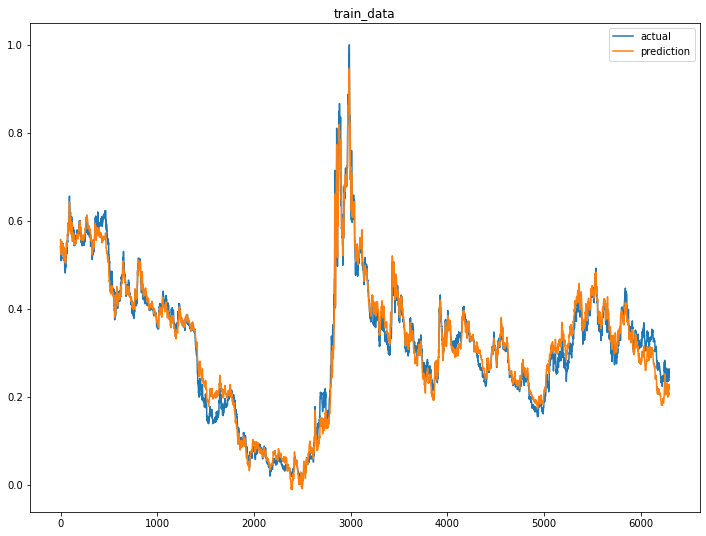

모델 설명력 (학습) 0.9780215308306017
모델 설명력 (검증) -0.8069894481738855


In [30]:
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]
print(x_test.shape, y_test.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

(1573, 1) (1573, 1)


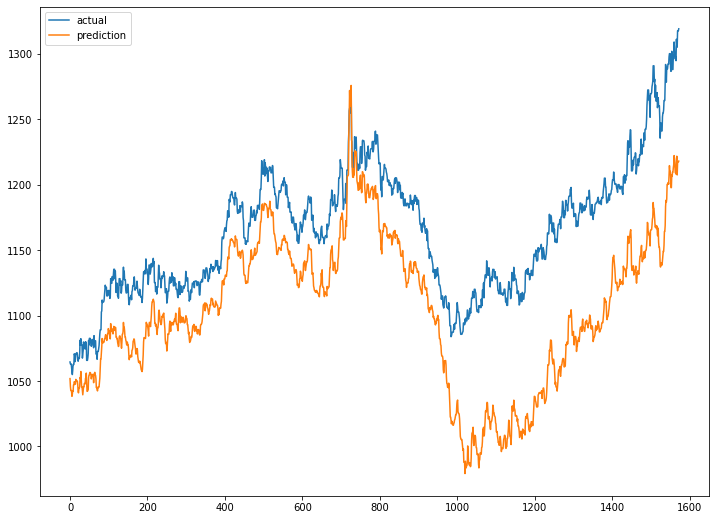

모델 설명력 (학습) 0.9780215308306017
모델 설명력 (검증) -0.8069894481738855
MSE 4514.10827162206
RMSE 67.18711388072909


In [31]:
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))


### 딥러닝 제외 머신러닝 분야

In [32]:
# 회귀모델
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor, StackingRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor # light xgboost
import lightgbm as lgb # lgb자체로도 학습이 가능 !! # https://for-my-wealthy-life.tistory.com/24



(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


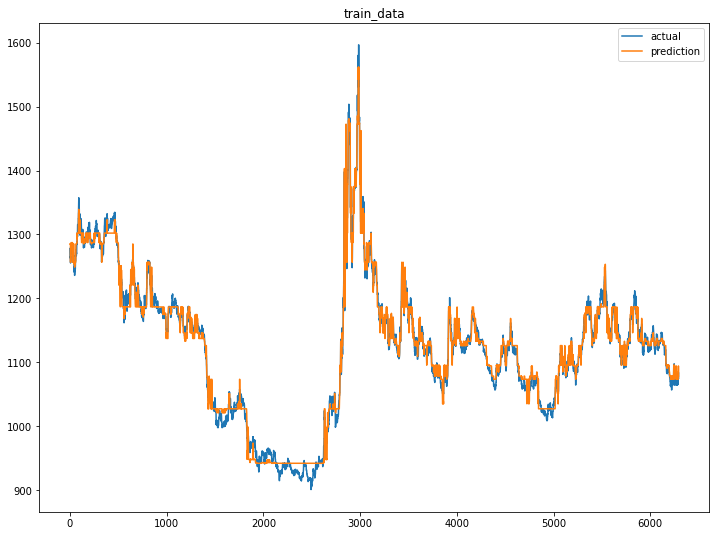

모델 설명력 (학습) 0.990106195185293
모델 설명력 (검증) 0.9653633143909821
MSE 119.44895211652936
(1573, 1) (1573, 1)


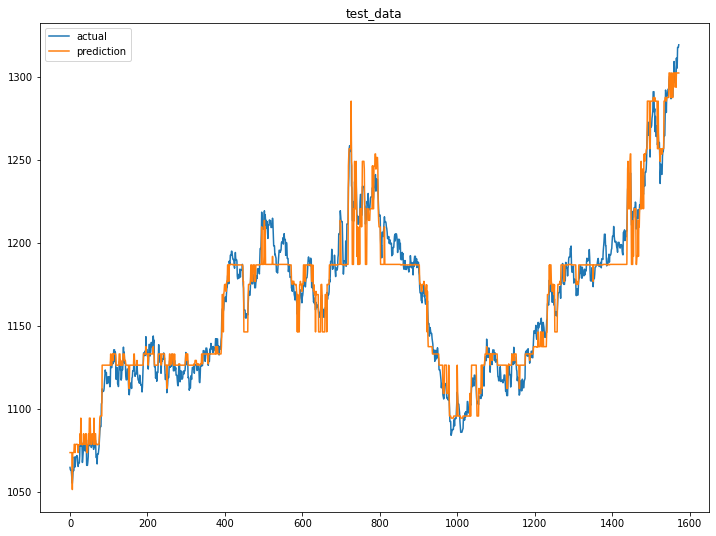

모델 설명력 (학습) 0.990106195185293
모델 설명력 (검증) 0.9653633143909821
MSE 86.52716473445706
RMSE 9.301997889402957


In [33]:
### 모델링

model = AdaBoostRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


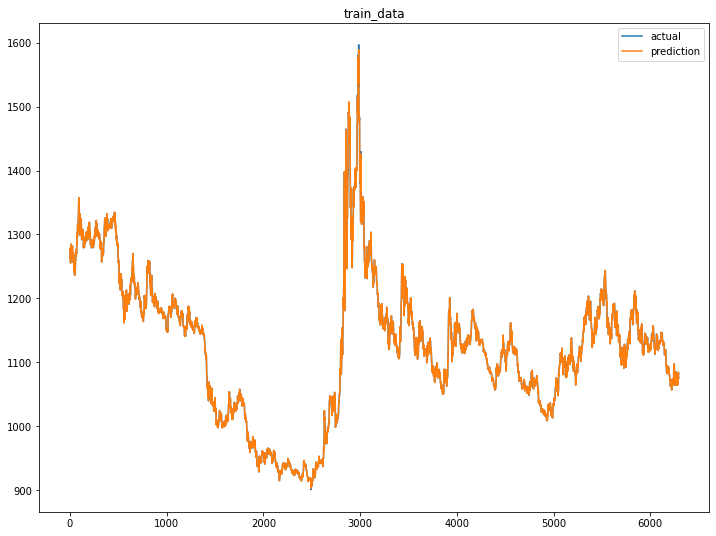

모델 설명력 (학습) 0.999991797031364
모델 설명력 (검증) 0.9999923077588071
MSE 0.0990353080711794
(1573, 1) (1573, 1)


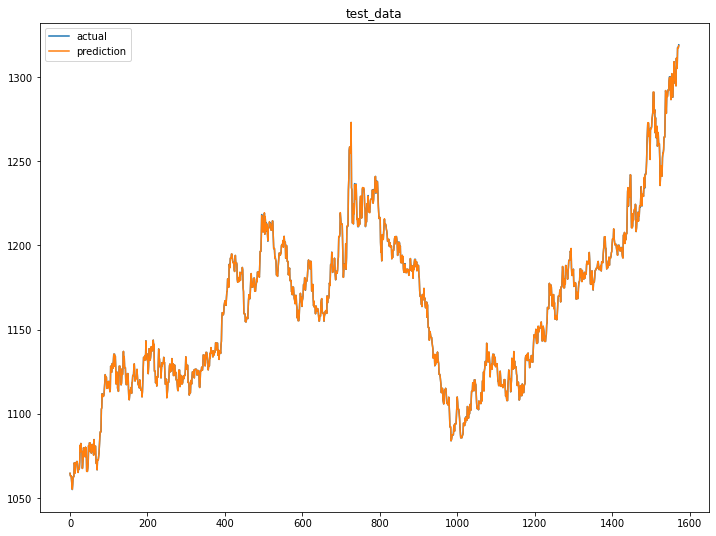

모델 설명력 (학습) 0.999991797031364
모델 설명력 (검증) 0.9999923077588071
MSE 0.01921626764144931
RMSE 0.13862275297168683


In [34]:
### 모델링

model = BaggingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


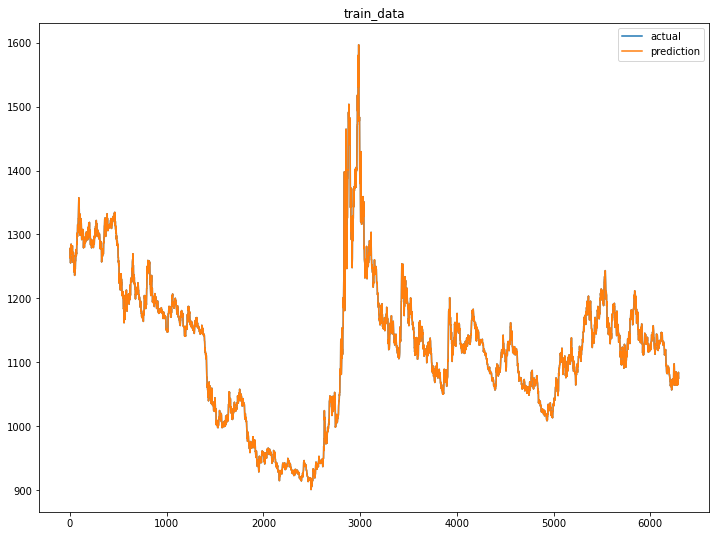

모델 설명력 (학습) 1.0
모델 설명력 (검증) 0.9984881231263604
MSE 1.1948876281785127e-25
(1573, 1) (1573, 1)


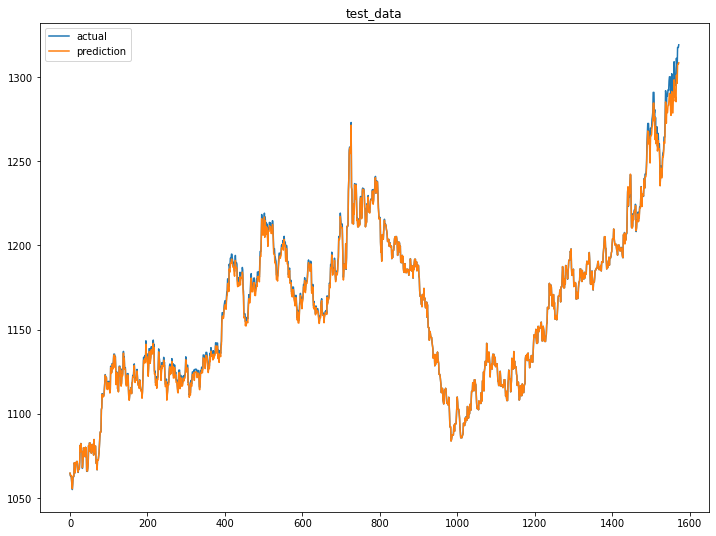

모델 설명력 (학습) 1.0
모델 설명력 (검증) 0.9984881231263604
MSE 3.7768746346091224
RMSE 1.9434182860643054


In [35]:
### 모델링

model = ExtraTreesRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


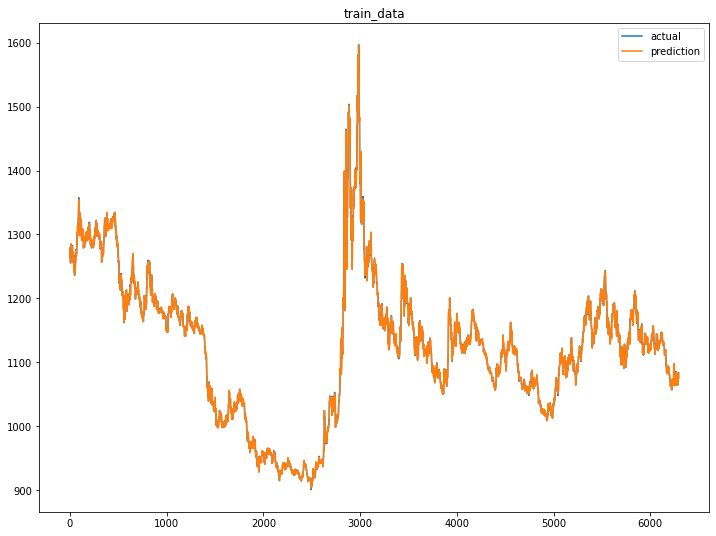

모델 설명력 (학습) 0.9999271221884279
모델 설명력 (검증) 0.9995131290886171
MSE 0.8798615282861659
(1573, 1) (1573, 1)


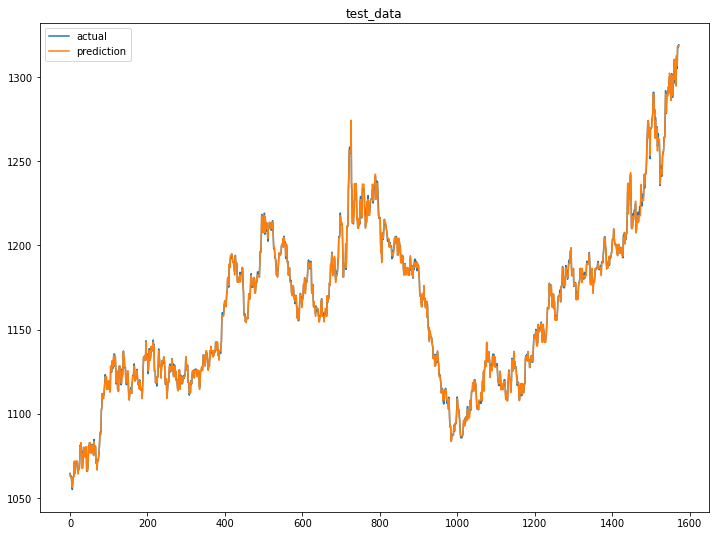

모델 설명력 (학습) 0.9999271221884279
모델 설명력 (검증) 0.9995131290886171
MSE 1.2162699407553572
RMSE 1.1028462906295498


In [36]:
### 모델링

model = GradientBoostingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


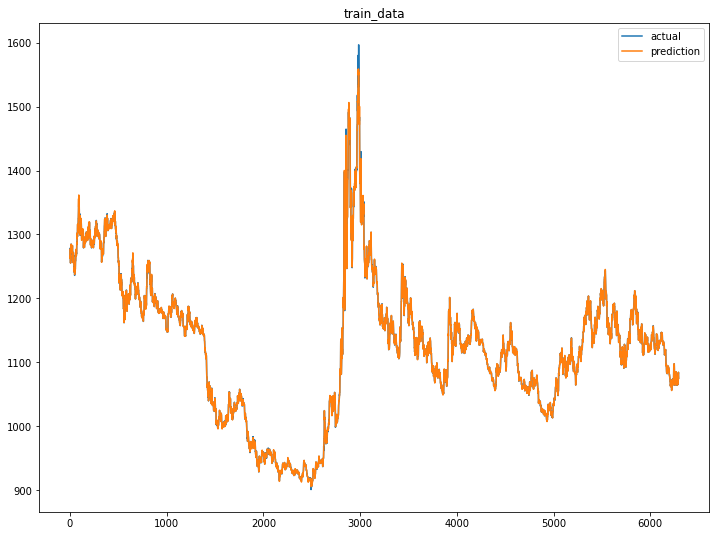

모델 설명력 (학습) 0.9998134557040996
모델 설명력 (검증) 0.9998782381898278
MSE 2.2521690174731885
(1573, 1) (1573, 1)


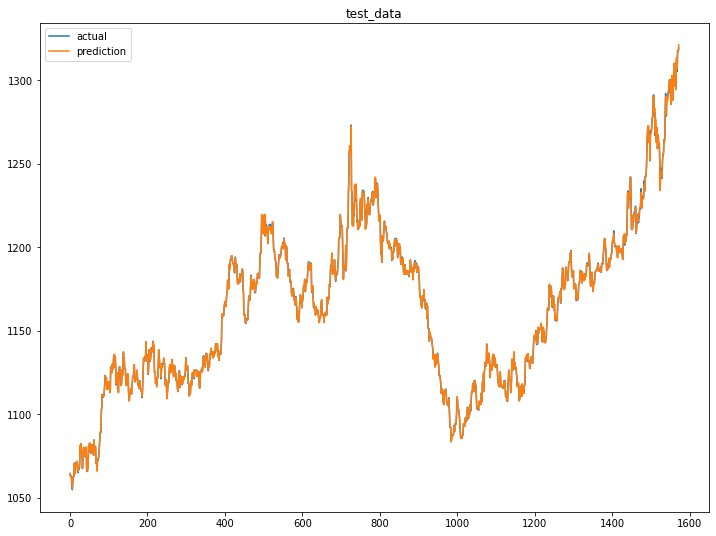

모델 설명력 (학습) 0.9998134557040996
모델 설명력 (검증) 0.9998782381898278
MSE 0.30417760885263273
RMSE 0.5515229903210135


In [37]:
### 모델링

model = HistGradientBoostingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


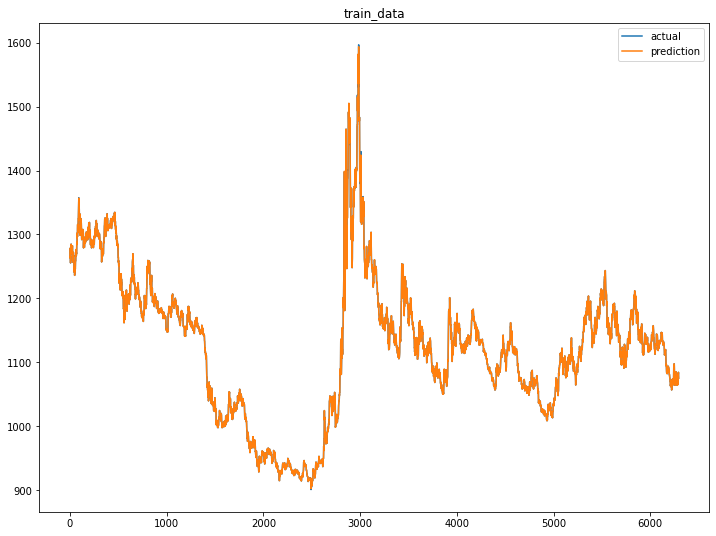

모델 설명력 (학습) 0.9999933563395969
모델 설명력 (검증) 0.999995833461557
MSE 0.08020961482840146
(1573, 1) (1573, 1)


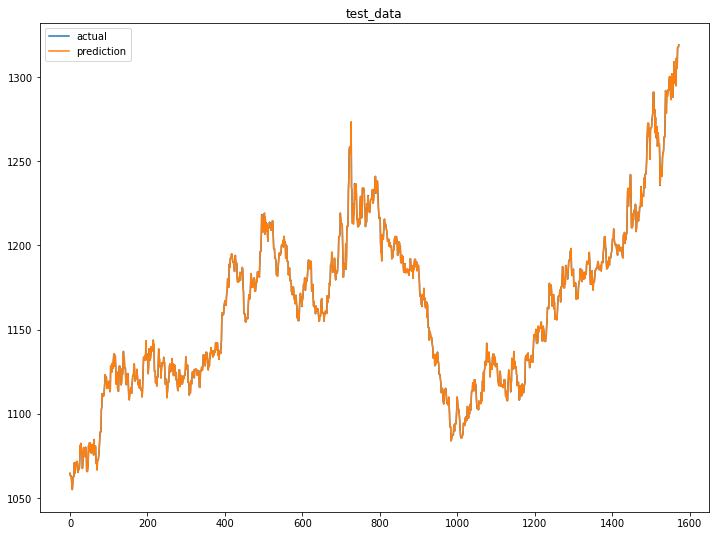

모델 설명력 (학습) 0.9999933563395969
모델 설명력 (검증) 0.999995833461557
MSE 0.010408581303241586
RMSE 0.10202245489715285


In [38]:
### 모델링

model = RandomForestRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

In [39]:
### 모델링

model = StackingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

TypeError: __init__() missing 1 required positional argument: 'estimators'

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


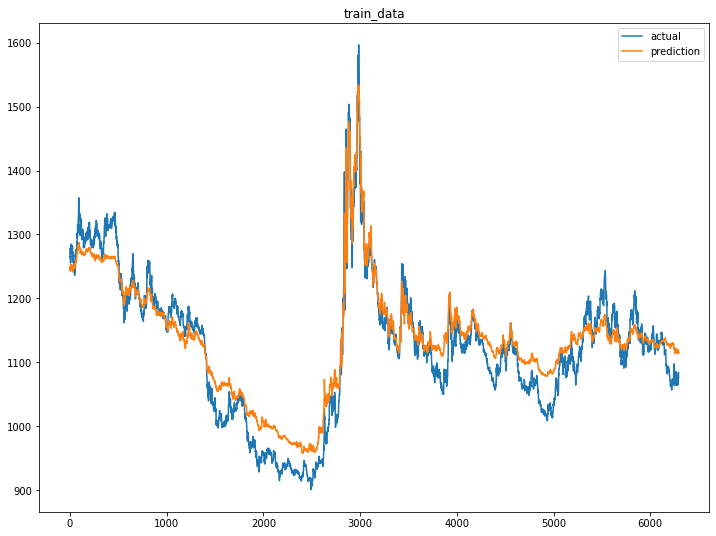

모델 설명력 (학습) 0.9112137019297606
모델 설명력 (검증) 0.1705082657240834
MSE 1071.9263686131148
(1573, 1) (1573, 1)


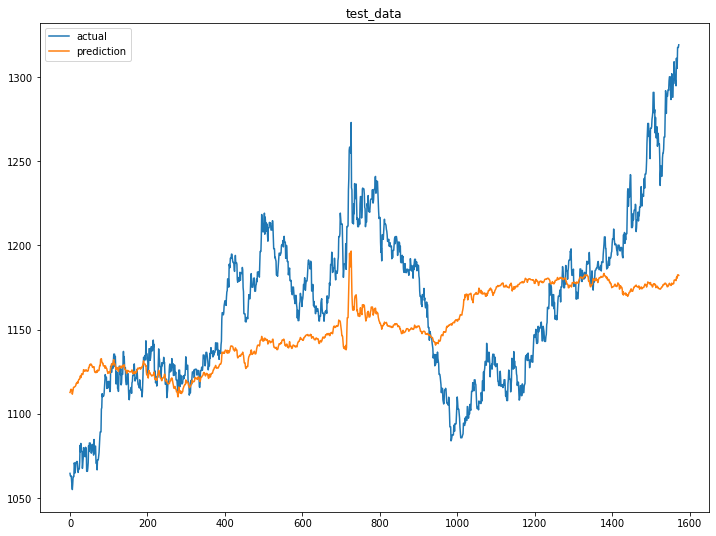

모델 설명력 (학습) 0.9112137019297606
모델 설명력 (검증) 0.1705082657240834
MSE 2072.1834862535443
RMSE 45.52124214313076


In [40]:
### 모델링

model = SVR()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


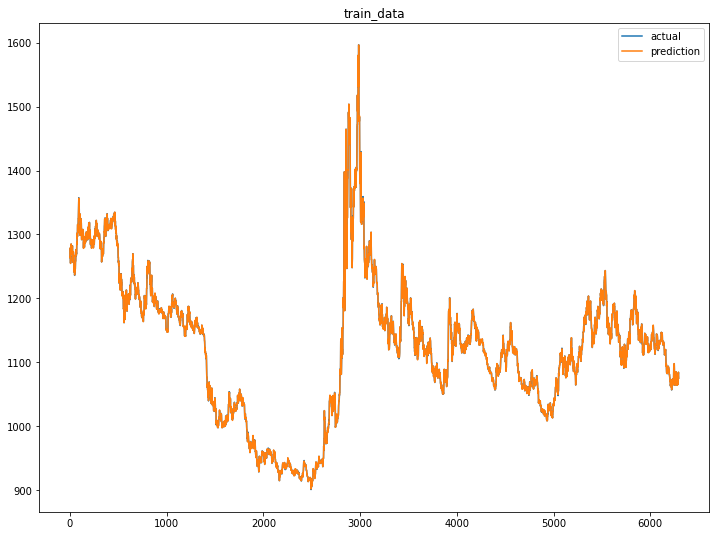

모델 설명력 (학습) 0.999981153171613
모델 설명력 (검증) 0.9998548914555083
MSE 0.227539690015051
RMSE 0.4770112053348967
(1573, 1) (1573, 1)


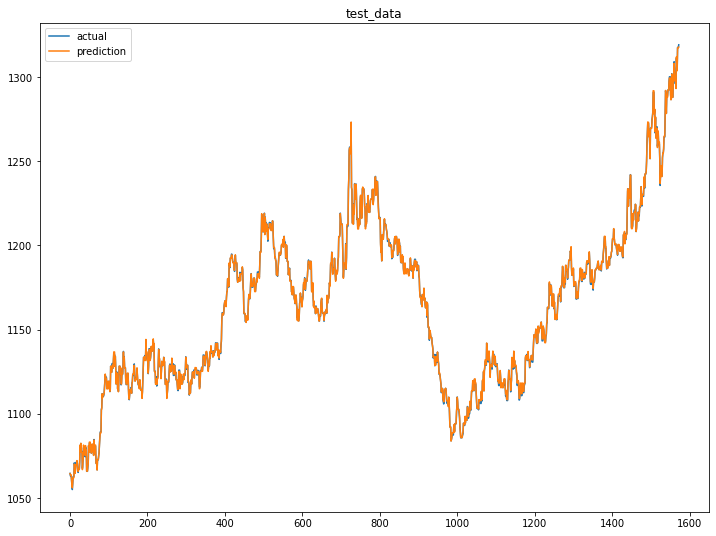

모델 설명력 (학습) 0.999981153171613
모델 설명력 (검증) 0.9998548914555083
MSE 0.3624965311862267
RMSE 0.60207684823968


In [41]:
### 모델링

model = XGBRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


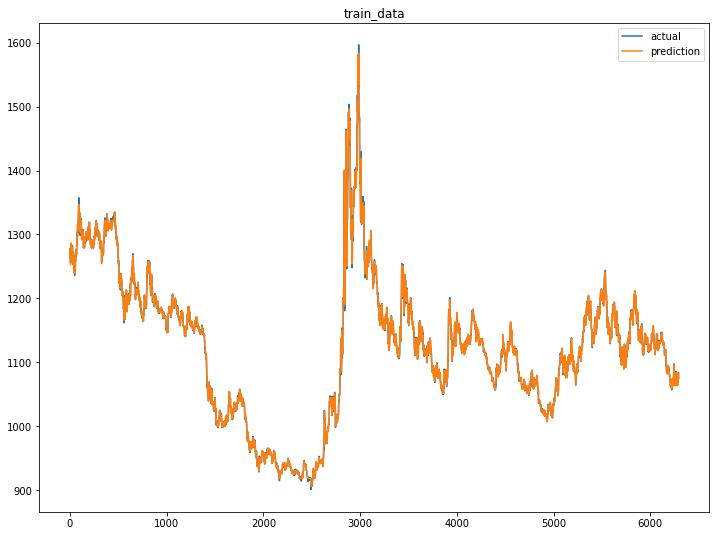

모델 설명력 (학습) 0.9997953018215888
모델 설명력 (검증) 0.9991860759063137
MSE 2.471343726697404
(1573, 1) (1573, 1)


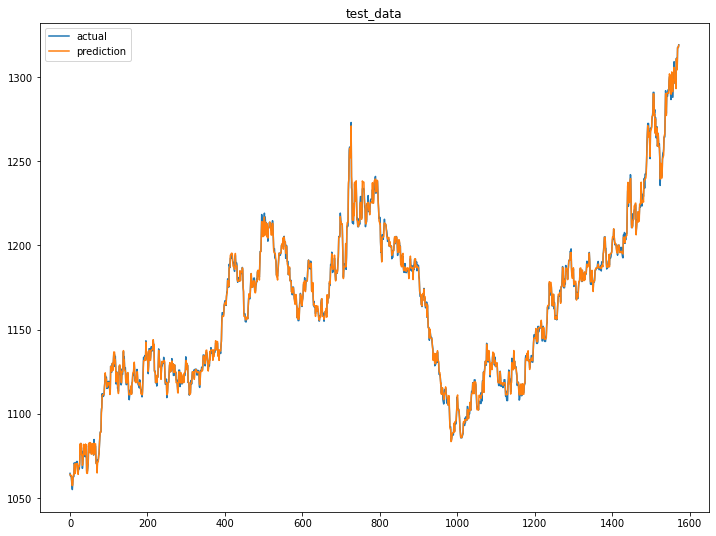

모델 설명력 (학습) 0.9997953018215888
모델 설명력 (검증) 0.9991860759063137
MSE 2.0332925630649994
RMSE 1.4259356798484983


In [42]:
### 모델링

model = XGBRFRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

(1573, 33) (1573, 1)
(6294, 1) (6294, 1)


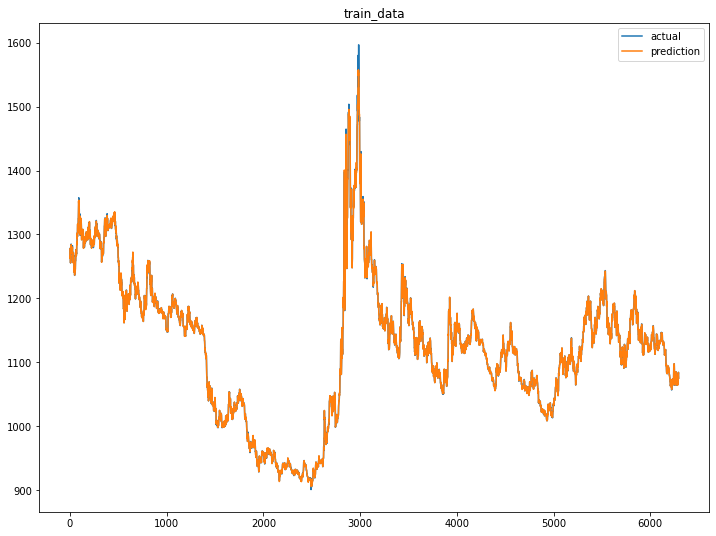

모델 설명력 (학습) 0.999784269471964
모델 설명력 (검증) 0.9998825717180244
MSE 2.6045374854312398
(1573, 1) (1573, 1)


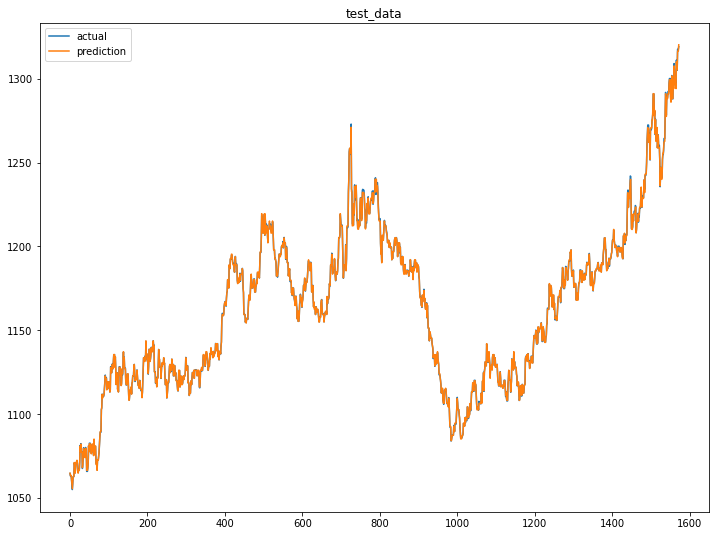

모델 설명력 (학습) 0.999784269471964
모델 설명력 (검증) 0.9998825717180244
MSE 0.29335186436961086
RMSE 0.5416196676355197


In [43]:
### 모델링

model = LGBMRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))
print("RMSE",mean_squared_error(actual["실제값"],pred["예측값"],squared=False))

### light xgboost

In [ ]:
import lightgbm as lgb # lgb자체로도 학습이 가능 !! # https://for-my-wealthy-life.tistory.com/24
lgb.Dataset(X_train, label=y_train.values)

In [ ]:
import lightgbm as lgb

#파라미터는 dict에
param = {'num_leaves': 31, 'objective': 'binary', 'metric':'auc'}

#train data를 별도의 Dataset객체로 만들어야 함
train_data = lgb.Dataset(X_train, label=y_train.values)

#boosting을 몇 번 할건지 결정
num_round = 10 

#모델에 훈련
bst = lgb.train(param, train_data, num_round)

#예측
y_pred_val = bst.predict(X_val)
print(y_pred_val)